In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.sparse as sp
import scipy.sparse.linalg as spl
from numba import jit
from scipy import spatial
from scipy.stats import linregress as linreg

# from IPython.display import display, Image, SVG, Math, YouTubeVideo,HTML
plt.rcParams['figure.figsize'] = [16, 12]
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

In [2]:
def relerr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))/np.linalg.norm((uexact))

def abserr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))

def cond(A):
    return np.linalg.cond(A)

def norm(M):
    return np.linalg.norm(M,2)

def inv(A):
    return np.linalg.inv(A)

def DM(pts,ctrs):
    return np.abs(np.subtract.outer(pts,ctrs))

def DM2D(x,y):
    return np.sqrt(np.abs(np.subtract.outer(x,x))**2 +\
                   np.abs(np.subtract.outer(y,y))**2)

def DM3D(x,y,z):
    return np.sqrt(np.abs(np.subtract.outer(x,x))**2 +\
                   np.abs(np.subtract.outer(y,y))**2 +\
                   np.abs(np.subtract.outer(z,z))**2)

def DM3D_eval(x,y,z,xe,ye,ze):
    return np.sqrt(abs(np.subtract.outer(xe,x))**(2)+\
                   abs(np.subtract.outer(ye,y))**(2)+\
                   abs(np.subtract.outer(ze,z))**(2))
def reshp(x):
    return x.reshape(len(x),1)

def gesol(lhs,rhs):
    return np.linalg.solve(lhs,rhs)

def reshp(x):
    return x.reshape(len(x),1)

def dm_nd(r,p):
    if len(r) == 1:
        x=r[0]
        return (np.abs(reshp(x)-reshp(x).T)**p)**(1.0/p)
    
    elif len(r) == 2:
        x=r[0].flatten();y=r[1].flatten()
        return (np.abs(reshp(x)-reshp(x).T)**p +\
        np.abs(reshp(y)-reshp(y).T)**p)**(1.0/p)
    
    elif len(r) == 3:
        x=r[0].flatten();y=r[1].flatten();z=r[2].flatten()
        return (np.abs(reshp(x)-reshp(x).T)**p +\
         np.abs(reshp(y)-reshp(y).T)**p +\
         np.abs(reshp(z)-reshp(z).T)**p)**(1.0/p)
    
    else:
        print("No Higher Dimensions Implemented")

## Triangles

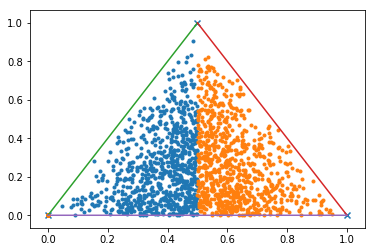

In [11]:
#Vertices
x0=0;x1=1;x2=0.5;y0=0;y1=0;y2=1
x=[x0,x1,x2]
y=[y0,y1,y2]
plt.scatter(x,y,marker='x')


#Edges
n=5000
xp0=np.linspace(x0,x2,n)
xp1=np.linspace(x2,x1,n)
yp0=np.linspace(y1,y2,n)
yp1=np.linspace(y2,y1,n)

# Find Points inside triangle
pt_int0 = np.zeros((n,2))
pt_int1 = np.zeros((n,2))

i=0
for xi,yi in zip(xp0,yp0):
    ptx0 = (0.5)*np.random.rand(1) + 0.0
    pty0 = (1.0)*np.random.rand(1) + 0.0
    if ptx0 >= xi and pty0 <= yi:
         pt_int0[i,:]=np.array([ptx0,pty0]).flatten()
    i+=1
i=0
for xi,yi in zip(xp1,yp1):
    ptx1 = (1.0-0.5)*np.random.rand(1) + 0.5
    pty1 = (1.0)*np.random.rand(1) + 0.0
    if ptx1 <= xi and pty1 <= yi:
         pt_int1[i,:]=np.array([ptx1,pty1]).flatten()
    i+=1
# np.where()
plt.plot((pt_int0.T)[0],(pt_int0.T)[1],'.')
plt.plot((pt_int1.T)[0],(pt_int1.T)[1],'.')
plt.plot(xp0,yp0,'-')
plt.plot(xp1,yp1,'-')
plt.plot(xp0*2,np.zeros(n),'-')

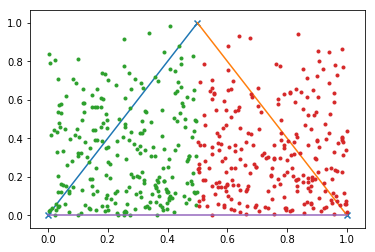

In [12]:
def triside(y,x,b):
    a = (y.max()-y.min())/(x.max() - x.min()) 
    return a*x - b

#Vertices
x0=0;x1=1;x2=0.5;y0=0;y1=0;y2=1
x=[x0,x1,x2]
y=[y0,y1,y2]
plt.scatter(x,y,marker='x')


#Edges
n=500
xp0=np.linspace(x0,x2,n)
xp1=np.linspace(x2,x1,n)
yp0=np.linspace(y1,y2,n)
yp1=np.linspace(y2,y1,n)

# Find Points inside triangle
ptx0 = (0.5)*np.random.random(n) + 0.0
pty0 = (1.0)*np.random.random(n) + 0.0
ptx1 = (1.0-0.5)*np.random.random(n) + 0.5
pty1 = (1)*np.random.random(n) + 0
   
ind_below0 = np.where(pty0 < triside(yp0,xp0,0))
ind_below1 = np.where(pty1 < triside(yp1,xp1,1))
plt.plot(xp0,yp0,'-')
plt.plot(xp1,yp1,'-')
plt.plot(ptx0[ind_below0],pty0[ind_below0],'.')
plt.plot(ptx1[ind_below1],pty1[ind_below1],'.')
# plt.plot(ptx0,pty0,'.')
# plt.plot(ptx1,pty1,'.')
plt.plot(xp0*2,np.zeros(n),'-')

In [13]:
x0 = -2; xn = 4; n = 35
y0 = -2; yn = 2;
z0 = -2; zn = 2;
xi = np.linspace(x0,xn,n)
yi = np.linspace(y0,yn,n)
zi = np.linspace(z0,zn,n)
# theta = np.linspace(0,2*np.pi,n)
# xx = np.outer((np.sqrt(xi**2+yi**2)),np.cos(theta))
# yy = np.outer((np.sqrt(xi**2+yi**2)),np.sin(theta))
# zz = np.outer(np.ones(n),zi)
# yi = (np.sqrt(zn**2-z0**2))*np.cos(theta)
xx,yy,zz = np.meshgrid(xi,yi,zi)
# xx = (xn-x0)*np.random.rand(n,n,n) + x0
# yy = (yn-y0)*np.random.rand(n,n,n) + y0
# zz = (zn-z0)*np.random.rand(n,n,n) + z0
x = xx.flatten(); y = yy.flatten(); z = zz.flatten()

# idxy = np.where(np.sqrt(x**2 + y**2) >= 1)
idxyz = np.where(np.sqrt(x**2 + y**2 + z**2) >= 1)

In [14]:
np.arange(x0,xn,hx+1)

array([-2.        , -0.71428571,  0.57142857,  1.85714286,  3.14285714])

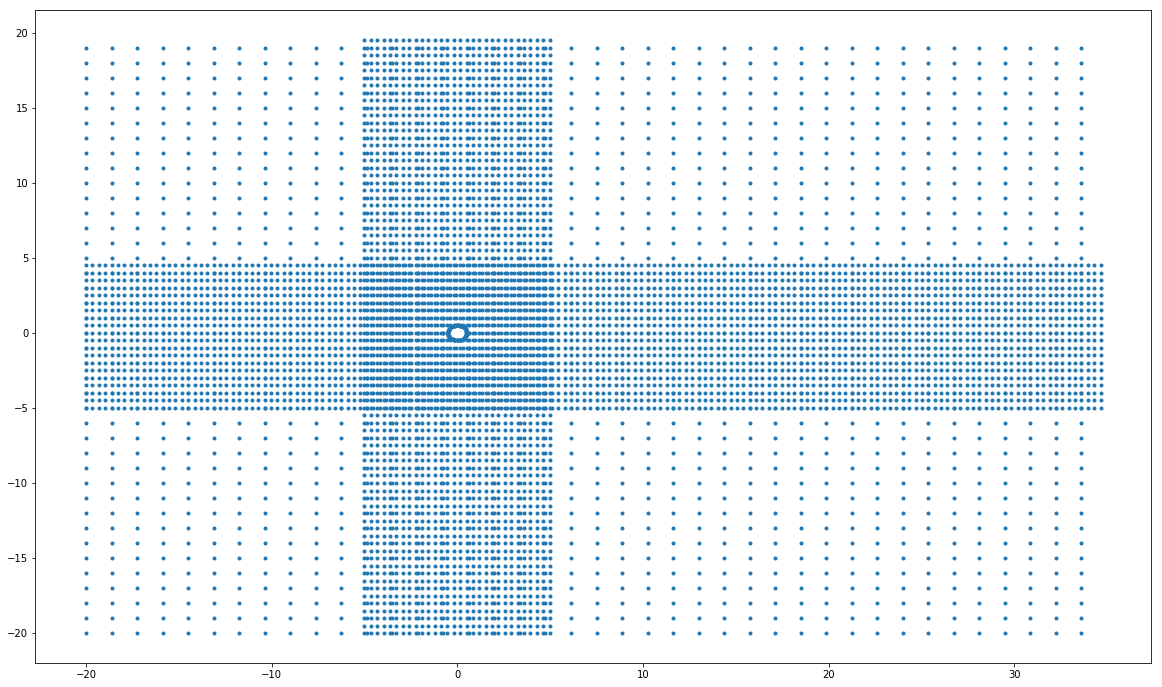

In [15]:
#channel block
x0 = -20; xn = 35
y0 = -20; yn = 20
nx = 40
ny = 40
hx = (xn - x0) / ( nx )
hy = (yn - y0) / ( ny )
grid = np.meshgrid(np.arange(x0,xn,hx),np.arange(y0,yn,hy))
x = grid[0].flatten(); y = grid[1].flatten()

#channel block 2
hx /= 4
hy /= 2
grid2 = np.meshgrid(np.arange(x0,xn,hx),np.arange(-5,5,hy))
x2 = grid2[0].flatten(); y2 = grid2[1].flatten()

#channel block 3
grid3 = np.meshgrid(np.arange(-5,5,hx),np.arange(y0,yn,hy))
x3 = grid3[0].flatten(); y3 = grid3[1].flatten()

#cylinder block 1
r = 0.5
idxy = np.where(np.sqrt(x**2 + y**2 ) >= 1.04*r)
xyz = [x[idxy],y[idxy]]

#cylinder block 2
idxy2 = np.where(np.sqrt(x2**2 + y2**2) >= 1.03*r)
xyz2 = [x2[idxy2],y2[idxy2]]

#cylinder block 3
idxy3 = np.where(np.sqrt(x3**2 + y3**2) >= 1.02*r)
xyz3 = [x3[idxy3],y3[idxy3]]


#cylinder block 4 & 5
nth = 40
theta = np.linspace(0,2*np.pi,nth)
xc1 = r*np.cos(theta); yc1 = r*np.sin(theta)
xc2 = 1.01*r*np.cos(theta); yc2 = 1.01*r*np.sin(theta)
xyzc1 = [xc1,yc1]
xyzc2 = [xc2,yc2]
# '''

# merged mesh blocks
xb = np.block([xyz[0],xyz2[0],xyz3[0],xyzc1[0],xyzc2[0]]).flatten()
yb = np.block([xyz[1],xyz2[1],xyz3[1],xyzc1[1],xyzc2[1]]).flatten()
# xb = np.block([xyz2[0],xyz3[0],xyzc1[0],xyzc2[0]]).flatten()
# yb = np.block([xyz2[1],xyz3[1],xyzc1[1],xyzc2[1]]).flatten()


#visualization
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
ax.scatter(xb,yb,marker='.')
# ax.plot_surface(xb.reshape())

In [101]:
# xb.shape,yb.reshape()
# 76369**(3/2)

In [87]:
# #channel block
# x0 = -20; xn = 35
# y0 = -20; yn = 20
# z0 = -20; zn = 20
# nx = 20
# ny = 20
# nz = 20
# hx = (xn - x0) / ( nx + 1 )
# hy = (yn - y0) / ( ny + 1 )
# hz = hy
# grid = np.meshgrid(np.arange(x0,xn,hx),np.arange(y0,yn,hy),np.arange(z0,zn,hz))
# x = grid[0].flatten(); y = grid[1].flatten(); z = grid[1].flatten()

# #channel block 2
# hx /= 4
# hy /= 2
# hz /= 2
# grid2 = np.meshgrid(np.arange(x0,xn,hx),np.arange(-5,5,hy),np.arange(-5,5,hz))
# x2 = grid2[0].flatten(); y2 = grid2[1].flatten(); z2 = grid2[2].flatten()

# #channel block 3
# grid3 = np.meshgrid(np.arange(-5,5,hx),np.arange(y0,yn,hy),np.arange(-5,5,hz))
# x3 = grid3[0].flatten(); y3 = grid3[1].flatten(); z3 = grid3[2].flatten()

# #sphere block 1
# r = 0.5
# idxy = np.where(np.sqrt(x**2 + y**2 + z**2) >= 1.04*r)
# xyz = [x[idxy],y[idxy],z[idxy]]

# #sphere block 2
# idxy2 = np.where(np.sqrt(x2**2 + y2**2 + z2**2) >= 1.03*r)
# xyz2 = [x2[idxy2],y2[idxy2],z2[idxy2]]

# #sphere block 3
# idxy3 = np.where(np.sqrt(x3**2 + y3**2 + z3**2) >= 1.02*r)
# xyz3 = [x3[idxy3],y3[idxy3],z3[idxy3]]


# nth = 60
# theta = np.linspace(0,2*np.pi,nth)
# phi = np.linspace(0,np.pi,nth)
# xs1 = r*np.outer(np.cos(theta),np.sin(phi)); 
# ys1 = r*np.outer(np.sin(theta),np.sin(phi))
# zs1 = r*np.outer(np.ones(nth),np.cos(phi));
# xs2 = 1.01*xs1 
# ys2 = 1.01*ys1
# zs2 = 1.01*zs1
# xyzs1 = [xs1.flatten(),ys1.flatten(),zs1.flatten()] 
# xyzs2 = [xs2.flatten(),ys2.flatten(),zs2.flatten()]

# '''
# rn = 0.5; r0 = 0
# golden_angle = np.pi * (3 - np.sqrt(5))
# theta = golden_angle * np.arange((nth+1)**2)
# z3 = np.linspace(rn - (1.0 / (nth+1)**2), (1.0 / (nth+1)**2) + z0, (nth+1)**2)
# r3 = np.sqrt(rn - z3* z3)
# xyz=[r3*np.cos(theta),r3*np.sin(theta),z3]
# '''

# # merged mesh blocks
# # xb = np.block([xyz[0],xyz2[0],xyzs1[0],xyzs2[0]]).flatten()
# # yb = np.block([xyz[1],xyz2[1],xyzs1[1],xyzs2[1]]).flatten()
# # zb = np.block([xyz[2],xyz2[2],xyzs1[2],xyzs2[2]]).flatten()
# xb = np.block([xyz[0],xyz2[0],xyz3[0],xyzc1[0],xyzc2[0]]).flatten()
# yb = np.block([xyz[1],xyz2[1],xyz3[1],xyzc1[1],xyzc2[1]]).flatten()
# zb = np.block([xyz[2],xyz2[2],xyz3[2],xyzs1[2],xyzs2[2]]).flatten()
# print(xb.shape,yb.shape,zb.shape)
# #visualization
# fig=plt.figure(figsize=(20,12))
# ax=fig.add_subplot(1,1,1,projection='3d')
# ax.scatter(xb,yb,zb,marker='.')

----------

In [5]:
%matplotlib qt5

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$



The $u$-momentum equation:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x} \\
& \qquad +\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

The $v$-momentum equation:

$$
\begin{split}
& \frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y} \\
& \qquad +\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

And the pressure equation:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

$$\Delta u^{n} \approx \frac{u_{i-1,j}^{n} + u_{i+1,j}^{n} -2u_{i,j}}{h_x^{2}}+\frac{u_{i,j-1}^{n} + u_{i,j+1}^{n} -2u_{i,j}}{h_y^{2}} $$
$$\Delta v^{n} \approx \frac{v_{i-1,j}^{n} + v_{i+1,j}^{n} -2v_{i,j}}{h_x^{2}}+\frac{v_{i,j-1}^{n} + v_{i,j+1}^{n} -2v_{i,j}}{h_y^{2}} $$

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2(\Delta x^2+\Delta y^2)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t} \left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

In [2]:
import sympy as sym

In [3]:
def lap(u,idx,idy,hx,hy):
	return (u[idx + 1 ,idy] + u[ idx - 1, idy ] - 2*u[idx,idy] )/(hx**2 )+\
	(u[idx , idy + 1 ] + u[ idx , idy - 1 ] -2*u[idx,idy] )/(hy**2)
def func(x,y):
    return np.cos(np.pi*(x+y))

In [4]:
x,y = sym.symbols('x y')
u = sym.cos(sym.pi*(x+y))
lapu = sym.diff(u,x,x) + sym.diff(u,y,y)
lapu

-2*pi**2*cos(pi*(x + y))

In [5]:
lapusym = sym.lambdify((x,y),lapu,'numpy')

In [20]:
x0 = -1 ; xn = 1
y0 = -1 ; yn = 1
ns = [2**i for i in range(3,9)]
errs = []
for nx,ny in zip(ns,ns):
    print(nx,ny)
    hy = (yn - y0)/( ny + 1 )
    hx = (xn - x0)/( nx + 1 )
    xi = np.linspace(x0,xn,nx+2)
    yi = np.linspace(y0,yn,ny+2)
    xx,yy = np.meshgrid(xi,yi)
    idx = np.arange(1,ny+1).reshape(ny,1)
    idy = np.arange(1,nx+1).reshape(1,nx)
    unp = func(xx,yy)
    errs.append(relerr(lap(unp,idx,idy,hx,hy),lapusym(xx,yy)[idx,idy]))
    

8 8
16 16
32 32
64 64
128 128
256 256


In [21]:
ps=[]
for i in range(len(errs)-1):
        p=-np.log(errs[i]/errs[i+1])/np.log(ns[i]/ns[i+1])
        ps.append(p)
        print(ps[i])

1.8182191938623846
1.909037663953075
1.9546534570271634
1.977383624170706
1.9887092457102051


In [1]:
0.25**2

0.0625

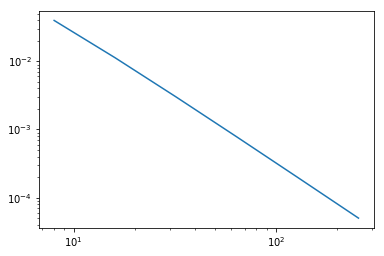

In [22]:
plt.loglog(ns,errs)

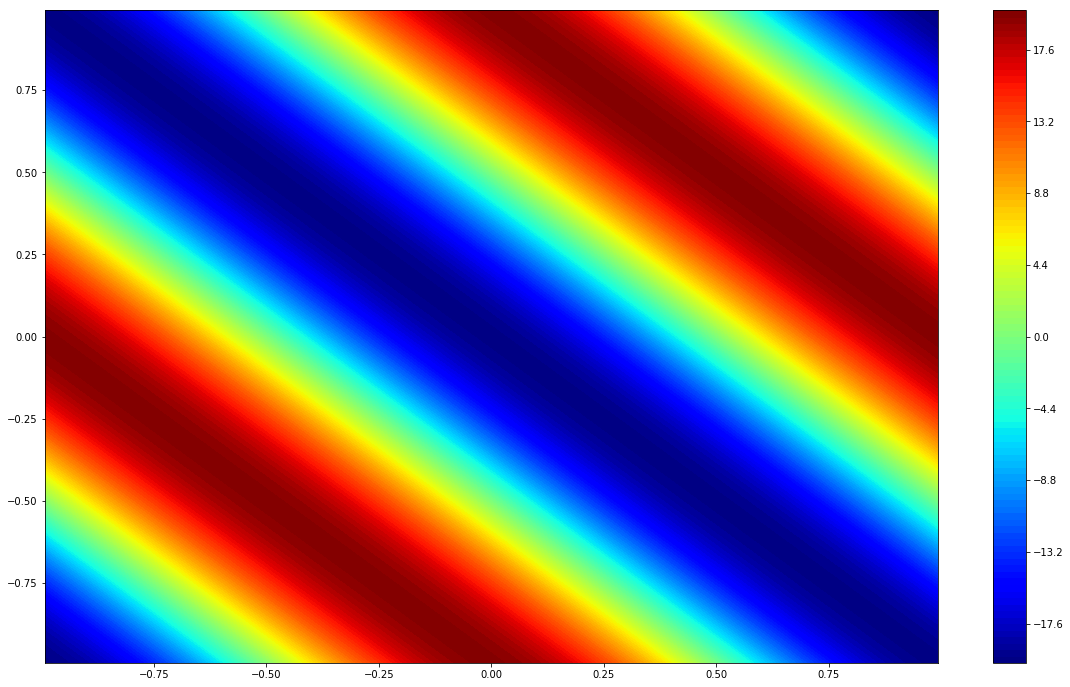

In [23]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
plt1 = ax.contourf(xx[idx,idy],yy[idx,idy],lap(unp,idx,idy,hx,hy),100,cmap ='jet')
fig.colorbar(plt1)

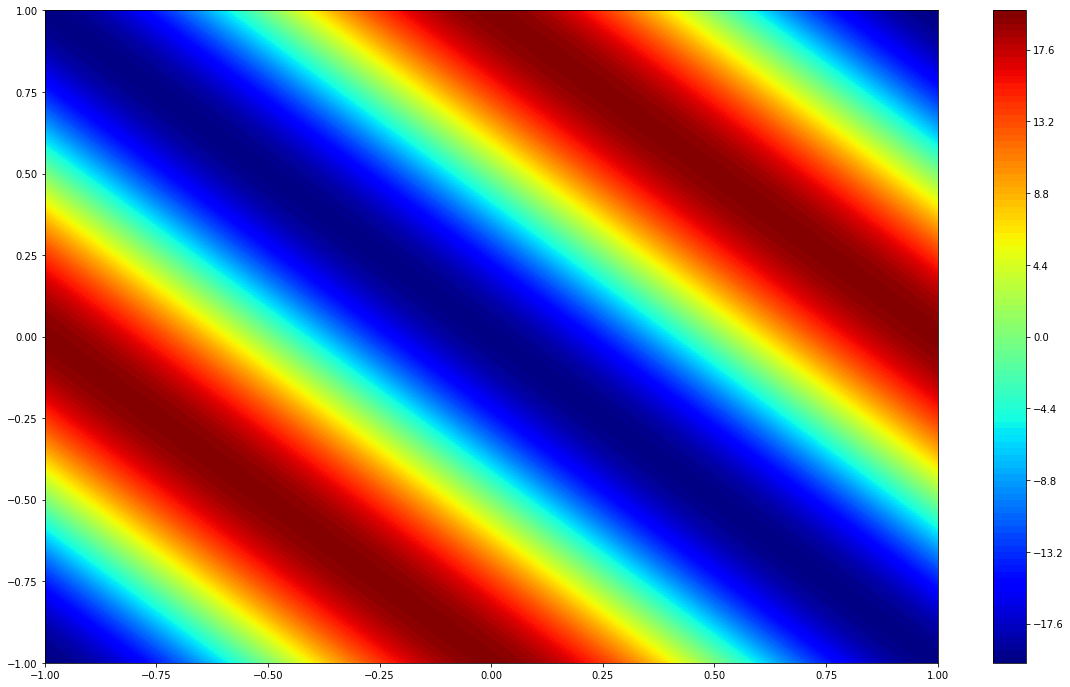

In [24]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
plt1 = ax.contourf(xx,yy,lapusym(xx,yy),100,cmap ='jet')
fig.colorbar(plt1)

## 1st Order
$${\displaystyle \qquad \qquad u_{x}^{-}={\frac {u_{i}^{n}-u_{i-1}^{n}}{\Delta x}}\,,\qquad u_{x}^{+}={\frac {u_{i+1}^{n}-u_{i}^{n}}{\Delta x}}}$$

## 2nd Order
$$\qquad \qquad u_x^- = \frac{3u_i^n - 4u_{i-1}^n + u_{i-2}^n}{2\Delta x}$$
$${\displaystyle \qquad \qquad u_{x}^{+}={\frac {-u_{i+2}^{n}+4u_{i+1}^{n}-3u_{i}^{n}}{2\Delta x}}}$$

## NSE_V1

In [7]:

def upwindord2v2(u,vel,idx,idy,hx,hy,dt):
    
    if vel[0].min() > 0 and vel[1].min() > 0:
        return dt*vel[0][idx,idy]*( 3*u[idx , idy] - 4*u[idx - 1, idy ] + u[idx - 2 , idy ])/(2*hx) +\
                   dt*vel[1][idx,idy]*( 3*u[idx , idy] - 4*u[idx , idy - 1 ] + u[idx  , idy - 2 ])/(2*hy)
    
    elif vel[0].min() > 0 and vel[1].min() < 0:
        return dt*vel[0][idx,idy]*( 3*u[idx , idy] - 4*u[idx - 1, idy ] + u[idx - 2 , idy ])/(2*hx) +\
                   dt*vel[1][idx,idy]*( -3*u[idx , idy] + 4*u[idx , idy + 1 ] + u[idx  , idy + 2 ])/(2*hy)
    
    elif vel[0].min() < 0 and vel[1].min() > 0:
        return dt*vel[0][idx,idy]*( -3*u[idx , idy] + 4*u[idx + 1, idy ] - u[idx + 2 , idy ])/(2*hx) +\
                   dt*vel[1][idx,idy]*( 3*u[idx , idy] - 4*u[idx , idy - 1 ] + u[idx  , idy - 2 ])/(2*hy)
    
    elif vel[0].min() < 0 and vel[1].min() > 0:
        return dt*vel[0][idx,idy]*( -3*u[idx , idy] + 4*u[idx + 1, idy ] - u[idx + 2 , idy ])/(2*hx) +\
                   dt*vel[1][idx,idy]*( -3*u[idx , idy] + 4*u[idx , idy + 1 ] - u[idx  , idy + 2 ])/(2*hy)
    
    else:
        return dt*vel[0][idx,idy]*( -3*u[idx , idy] + 4*u[idx + 1, idy ] - u[idx + 2 , idy ])/(2*hx) +\
                   dt*vel[1][idx,idy]*( -3*u[idx , idy] + 4*u[idx , idy + 1 ] - u[idx  , idy + 2 ])/(2*hy)
    
def upwindord1v2(u,vel,idx,idy,hx,hy,dt):
    if vel[0].min() > 0 and vel[1].min() > 0:
        return dt*vel[0][idx,idy]*( u[idx , idy] - u[idx - 1, idy ] )/(hx) +\
                   dt*vel[1][idx,idy]*( u[idx , idy  ] - u[idx  , idy - 1])/(hy)
    
    elif vel[0].min() > 0 and vel[1].min() < 0:
        return dt*vel[0][idx,idy]*( u[idx , idy] - u[  idx - 1, idy ] )/(hx) +\
                   dt*vel[1][idx,idy]*( u[ idx , idy + 1 ] - u[ idx , idy ])/(hy)
    
    elif vel[0].min() < 0 and vel[1].min() > 0:
        return dt*vel[0][idx,idy]*( u[idx + 1 , idy] - u[idx , idy ] )/(hx) +\
                   dt*vel[1][idx,idy]*( u[idx , idy ] - u[idx  , idy - 1 ])/(hy)
    
    elif vel[0].min() < 0 and vel[1].min() > 0:
        return dt*vel[0][idx,idy]*( u[idx + 1 , idy] - u[idx , idy ] )/(hx) +\
                   dt*vel[1][idx,idy]*( u[idx + 1 , idy ] - u[idx  , idy ])/(hy)
    
    else:
        return dt*vel[0][idx,idy]*( u[idx + 1 , idy] - u[idx , idy ] )/(hx) +\
                   dt*vel[1][idx,idy]*( u[idx + 1 , idy ] - u[idx  , idy ])/(hy)



--------------------

## Channel Flow

In [175]:
mcheps=np.finfo(dtype=np.float64).eps

In [161]:
# %%writefile navstokes.py
# Timestepping Methods
#-------------------------------------------------------------------------------
def forwardeuler(u,v,p,dt,hx,hy,nu,idx,idy,advscheme):
    
    #solve momentum and pressure equations
    tmpu = u[idx,idy] - advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'x'))
    tmpv = v[idx,idy] - advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'y'))
    return tmpu,tmpv
    
def rk2(u,v,p,dt,hx,hy,nu,idx,idy,advscheme):
    su1 = advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))
    su2 = (advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))) + dt*su1
    
    sv1 = advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'y'))
    sv2 = (advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'y'))) + dt*sv1
    
    tmpu = u[idx,idy] + (su1 + su2)/2
    tmpv = v[idx,idy] + (sv1 + sv2)/2
    return tmpu,tmpv

def rk4(u,v,p,dt,hx,hy,nu,idx,idy,advscheme):
    su1 = advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))

    su2 = (advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))) + (su1/2)

    su3 = (advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))) + (su2/2)

    su4 = (advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))) + (su3)

    sv1 = advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'y'))

    sv2 = (advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'y'))) + (sv1/2)

    sv3 = (advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'y'))) + (sv2/2)

    sv4 = (advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'y'))) + (sv3)

    tmpu = u[idx,idy]+((su1/6)+(su2/3)+(su3/3)+(su4/6))
    tmpv = v[idx,idy]+((sv1/6)+(sv2/3)+(sv3/3)+(sv4/6))
    return tmpu,tmpv
# -----------------------------------------------------------------------------
# advection,laplacian schemes and poisson solvers
def poibicgstab(f,hy,hx,nx,ny):

    # Sparse Differentiation Matrices (2D Discrete Laplacian)
    l1x=[1]*(nx-1)
    l0x=[-2]*(nx)
    l1y=[1]*(ny-1)
    l0y=[-2]*(ny)
	
    D2_x=sp.diags( [l1x,l0x,l1x], [-1,0,1], format='csr')
    D2_y=sp.diags( [l1y,l0y,l1y], [-1,0,1], format='csr')

    I_x=sp.eye(nx)
    I_y=sp.eye(ny)
    D2x=(hx**-2)*sp.kron(D2_x,I_y)
    D2y=(hy**-2)*sp.kron(I_x,D2_y)
    L=(D2x+D2y)

    #RHS
    f=np.reshape(f,nx*ny)
    
    #krylov methods
    ubicgs,itr=spl.bicgstab(L,f,tol=1e-9)
    #print("\r iter = %d"%itr , end = " ")
    
    return ubicgs.reshape(nx,ny)

def lap(u,idx,idy,hx,hy):
	return (u[idx + 1 ,idy] + u[ idx - 1, idy ] - 2*u[idx,idy] )/(hx**2 )+\
	(u[idx , idy + 1 ] + u[ idx , idy - 1 ] -2*u[idx,idy] )/(hy**2)

def upwindord1(u,vel,idx,idy,hx,hy,dt):
    return dt*vel[0][idx,idy]*( u[idx , idy] - u[idx - 1, idy ] )/(hx) +\
               dt*vel[1][idx,idy]*( u[idx , idy  ] - u[idx  , idy - 1])/(hy)

def upwindord2(u,vel,idx,idy,hx,hy,dt):
    return dt*vel[0][idx,idy]*( 3*u[idx , idy] - 4*u[idx - 1, idy ] + u[idx - 2 , idy ])/(2*hx) +\
                   dt*vel[1][idx,idy]*( 3*u[idx , idy] - 4*u[idx , idy - 1 ] + u[idx  , idy - 2 ])/(2*hy)

def laxw(u,vel,idx,idy,hx,hy,dt):
    fin = 0.5*(u[idx + 1, idy] + u[idx,idy]) - (vel[0][idx,idy])*(dt/(2*hx))*(u[idx + 1, idy] - u[idx , idy])
    fout = 0.5*(u[idx , idy] + u[idx - 1,idy]) - (vel[0][idx,idy])*(dt/(2*hx))*(u[idx, idy] - u[idx - 1, idy])
    gin = 0.5*(u[idx + 1, idy] + u[idx,idy]) - (vel[1][idx,idy])*(dt/(2*hy))*(u[idx, idy + 1] - u[idx , idy])
    gout = 0.5*(u[idx , idy] + u[idx,idy - 1]) - (vel[1][idx,idy])*(dt/(2*hy))*(u[idx , idy] - u[idx, idy - 1])
    return (vel[0][idx,idy]*(dt/hx))*( fin - fout ) + (vel[1][idx,idy]*(dt/hy))*( gin - gout )

def ppe(p,u,v,dt,idx,idy,hx,hy,rho):
    nx2 , ny2 = p.shape
    nx = nx2 - 2; ny = ny2 - 2
    
    def gradxu(u,indx,indy,hx):
        return ( u[indx+1,indy] - u[indx-1,indy] )/(2*hx)

    def gradyu(u,indx,indy,hy):
        return ( u[indx,indy+1] - u[indx,indy-1] )/(2*hy)
    
    # rhs \nabla^{2} p = \partial_x u**2  + 2*\partial_y u*\partial_x v + \partial_y u**2
    rhs = np.zeros((nx+2,ny+2))
    rhs[idx,idy] = rho*((hx**2 * hy**2 )/(2*(hx**2 + hy**2 ))) *\
                    ((1/dt)*(gradxu(u,idx,idy,hx) + gradyu(v,idx,idy,hy)) -\
                    ( gradxu(u,idx,idy,hx)**2 + 2*(gradyu(u,idx,idy,hy)*gradxu(v,idx,idy,hx)) +\
                    gradyu(v,idx,idy,hy)**2))

    # solve pressure poisson equation
    p = poibicgstab(rhs[idx,idy],hy,hx,nx,ny)
#     p,res = sorppe(u,v,p,rho,dt,omega,nx,ny,hx,hy)
    return p

#pressure gradient
def gradp(p,idx,idy,hx,hy,component):
	if component == 'x':
		return ( p[ idx + 1 , idy ] - p[ idx - 1 , idy ] )/(2*hx)
	else:
		return ( p[ idx , idy + 1 ] - p[ idx , idy - 1 ] )/(2*hy)

nx = 40
ny = 20
tfinal = 10
dt = 0.001

x0 = -1 ; xn = 3
y0 = -1 ; yn = 1
hy = (yn - y0)/( ny + 1 )
hx = (xn - x0)/( nx + 1 )
u = np.zeros((ny+2,nx+2))
v = np.zeros((ny+2,nx+2))
p = np.zeros((ny+2,nx+2))
xi = np.linspace(x0,xn,nx)
yi = np.linspace(y0,yn,ny)
xx,yy = np.meshgrid(xi,yi)

# constants
nu = 0.1
rho = 1

# interior indices 
uidx = np.arange(2,ny).reshape(ny-2,1)
uidy = np.arange(1,nx+1).reshape(1,nx)
idx = np.arange(1,ny+1).reshape(ny,1)
idy = np.arange(1,nx+1).reshape(1,nx)

# initial conditions 
u[ idx , :1 ] = 1

# BC
u[ -1 ] = 0 
u[ 0  ] = 0 
v[ -1 ] = 0 
v[ 0  ] = 0 
u[ idx , -1 ] = u[ idx , -2  ]
v[ idx , -1 ] = v[ idx , -2  ]
p[ idx , 0  ] = p[ idx ,  1  ] 
p[ 0 , idy  ] = p[ 1  , idy  ] 
p[ -1 , idy  ] = p[ -2 , idy  ]
p[ idx , -1 ] =  0

t = 0
udiff = 1
pdiff = 1
tol = 1e-8
while (t < tfinal):
#while (udiff > tol and pdiff > tol):
    tmpp = ppe(p,u,v,dt,idx,idy,hx,hy,rho)
#     tmpu,tmpv = forwardeuler(u,v,dt,hx,hy,nu,idx,idy,laxw)
#     p[idx,idy] = tmpp
    tmpu,tmpv = rk4(u,v,p,dt,hx,hy,nu,idx,idy,upwindord1v2)
#     tmpu,tmpv = rk2(u,v,p,dt,hx,hy,nu,idx,idy,upwindord2)
#     u[idx,idy] = tmpu;v[idx,idy] = tmpv;
#     tmpp = ppe(p,u,v,dt,idx,idy,hx,hy,rho)
    # update boundary conditions
    tmpu[ : , 0 ] = 1
    tmpu[ : , -1 ] = tmpu[ : , -2  ]
    tmpv[ : , -1 ] = tmpv[ : , -2  ]
    tmpp[ : , 0  ] = tmpp[ : , 1  ] 
    tmpp[ 0 , :  ] = tmpp[ 1 , :  ] 
    tmpp[ -1 , : ] = tmpp[ -2 , :  ]   
    tmpp[ : , -1 ] = 0
    tmpu[ -1 ] = 0 
    tmpu[ 0 ] = 0 
    tmpv[ -1 ] = 0 
    tmpv[ 0 ] = 0 
    udiff = relerr(tmpu,u[idx,idy]+mcheps)
    pdiff = relerr(tmpp,p[idx,idy]+mcheps)
    
    # update momentum and pressure for next timestep
    u[idx,idy] = tmpu
    v[idx,idy] = tmpv
    p[idx,idy] = tmpp
    
    t += dt
    print("\r time = %g"%t,"udiff = %g"%udiff ,"pdiff = %g"%pdiff , end = " ")
    if udiff < tol and pdiff < tol:
        break;
        
print(" ") 

 time = 1.594 udiff = 3.21424e-05 pdiff = 5.64528e-05 

KeyboardInterrupt: 

In [162]:
xi = np.linspace(x0,xn,nx)
yi = np.linspace(y0,yn,ny)
xx,yy = np.meshgrid(xi,yi)
# xx = xx[idx,idy]; yy = yy[idx,idy]
um = np.sqrt(u**2 + v**2)

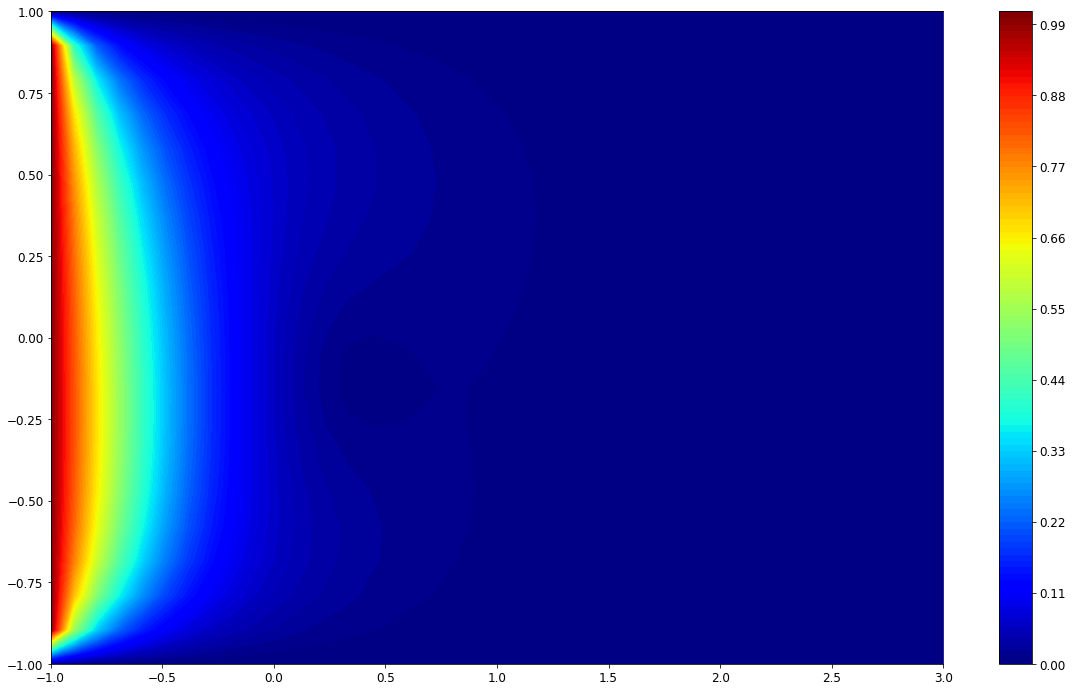

In [163]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
plt1 = ax.contourf(xx,yy,um[idx,idy],100,cmap ='jet')
# plt1 = ax.contourf(xx,yy,u[idx,idy],100,cmap ='jet')
# plt1 = ax.contourf(xx,yy,v[idx,idy],100,cmap ='jet')
# plt1 = ax.contourf(xx,yy,p[idx,idy],100,cmap ='jet')
# ax.quiver(xx,yy,u,v)

fig.colorbar(plt1)

In [12]:
def exact(y):
    return 1 - y**2

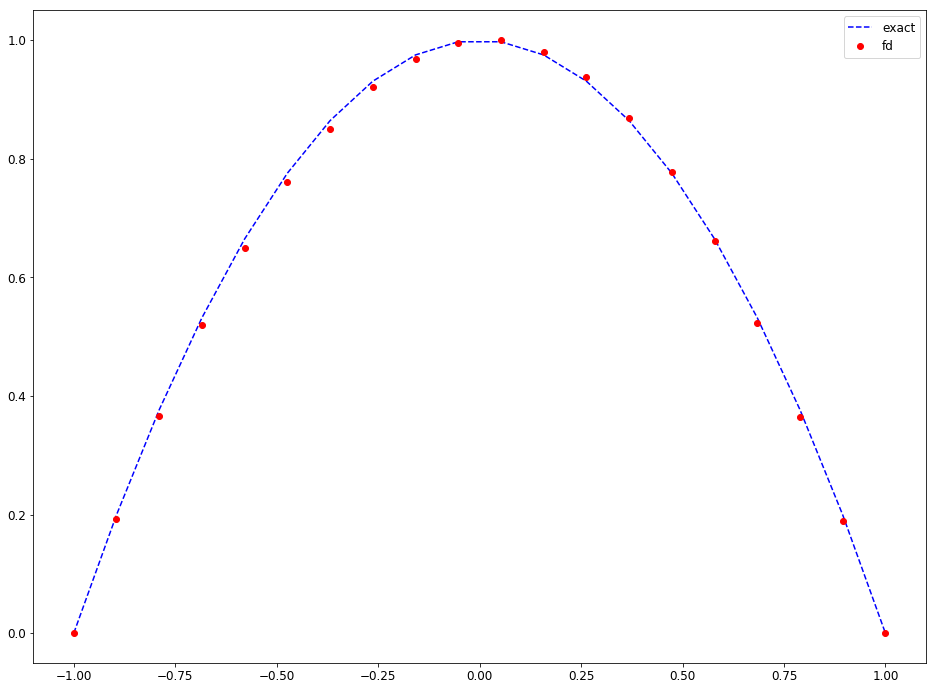

In [17]:
ums = (um[idx,-2]/um[idx,-2].max()).flatten()
plt.plot(yi,exact(yi),'b--',label = 'exact')
plt.plot(yi,ums,'ro',label = 'fd')
# plt.plot(yi,np.abs(exact(yi)-ums),'b',label = 'error')
plt.legend()

-----------

## Flow Past Cylinder

In [174]:
# %%writefile navstokes.py
# Timestepping Methods
#-------------------------------------------------------------------------------
def forwardeuler(u,v,p,dt,hx,hy,nu,idx,idy,advscheme):
    
    #solve momentum and pressure equations
    tmpu = u[idx,idy] - advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'x'))
    tmpv = v[idx,idy] - advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'y'))
    return tmpu,tmpv
    
def rk2(u,v,p,dt,hx,hy,nu,idx,idy,advscheme):
    su1 = advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))
    su2 = (advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))) + dt*su1
    
    sv1 = advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'y'))
    sv2 = (advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'y'))) + dt*sv1
    
    tmpu = u[idx,idy] + (su1 + su2)/2
    tmpv = v[idx,idy] + (sv1 + sv2)/2
    return tmpu,tmpv

def rk4(u,v,p,dt,hx,hy,nu,idx,idy,advscheme):
    su1 = advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))

    su2 = (advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))) + (su1/2)

    su3 = (advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))) + (su2/2)

    su4 = (advscheme(u,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(u,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'x'))) + (su3)

    sv1 = advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'y'))

    sv2 = (advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'y'))) + (sv1/2)

    sv3 = (advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'y'))) + (sv2/2)

    sv4 = (advscheme(v,[u,v],idx,idy,hx,hy,dt) + dt*(nu*lap(v,idx,idy,hx,hy) -\
        gradp(p,idx,idy,hx,hy,'y'))) + (sv3)

    tmpu = u[idx,idy]+((su1/6)+(su2/3)+(su3/3)+(su4/6))
    tmpv = v[idx,idy]+((sv1/6)+(sv2/3)+(sv3/3)+(sv4/6))
    return tmpu,tmpv
# -----------------------------------------------------------------------------
# advection,laplacian schemes and poisson solvers
def poibicgstab(f,hy,hx,nx,ny):

    # Sparse Differentiation Matrices (2D Discrete Laplacian)
    l1x=[1]*(nx-1)
    l0x=[-2]*(nx)
    l1y=[1]*(ny-1)
    l0y=[-2]*(ny)
	
    D2_x=sp.diags( [l1x,l0x,l1x], [-1,0,1], format='csr')
    D2_y=sp.diags( [l1y,l0y,l1y], [-1,0,1], format='csr')

    I_x=sp.eye(nx)
    I_y=sp.eye(ny)
    D2x=(hx**-2)*sp.kron(D2_x,I_y)
    D2y=(hy**-2)*sp.kron(I_x,D2_y)
    L=(D2x+D2y)

    #RHS
    f=np.reshape(f,nx*ny)
    
    #krylov methods
    ubicgs,itr=spl.bicgstab(L,f,tol=1e-8)
    #print("\r iter = %d"%itr , end = " ")
    
    return ubicgs.reshape(nx,ny)

def lap(u,idx,idy,hx,hy):
	return (u[idx + 1 ,idy] + u[ idx - 1, idy ] - 2*u[idx,idy] )/(hx**2 )+\
	(u[idx , idy + 1 ] + u[ idx , idy - 1 ] -2*u[idx,idy] )/(hy**2)

def upwindord1(u,vel,idx,idy,hx,hy,dt):
    return dt*vel[0][idx,idy]*( u[idx , idy] - u[idx - 1, idy ] )/(hx) +\
               dt*vel[1][idx,idy]*( u[idx , idy  ] - u[idx  , idy - 1])/(hy)

def upwindord2(u,vel,idx,idy,hx,hy,dt):
    return dt*vel[0][idx,idy]*( 3*u[idx , idy] - 4*u[idx - 1, idy ] + u[idx - 2 , idy ])/(2*hx) +\
                   dt*vel[1][idx,idy]*( 3*u[idx , idy] - 4*u[idx , idy - 1 ] + u[idx  , idy - 2 ])/(2*hy)

def laxw(u,vel,idx,idy,hx,hy,dt):
    fin = 0.5*(u[idx + 1, idy] + u[idx,idy]) - (vel[0][idx,idy])*(dt/(2*hx))*(u[idx + 1, idy] - u[idx , idy])
    fout = 0.5*(u[idx , idy] + u[idx - 1,idy]) - (vel[0][idx,idy])*(dt/(2*hx))*(u[idx, idy] - u[idx - 1, idy])
    gin = 0.5*(u[idx + 1, idy] + u[idx,idy]) - (vel[1][idx,idy])*(dt/(2*hy))*(u[idx, idy + 1] - u[idx , idy])
    gout = 0.5*(u[idx , idy] + u[idx,idy - 1]) - (vel[1][idx,idy])*(dt/(2*hy))*(u[idx , idy] - u[idx, idy - 1])
    return (vel[0][idx,idy]*(dt/hx))*( fin - fout ) + (vel[1][idx,idy]*(dt/hy))*( gin - gout )

def ppe(p,u,v,dt,idx,idy,hx,hy,rho):
    nx2 , ny2 = p.shape
    nx = nx2 - 2; ny = ny2 - 2
    
    def gradxu(u,indx,indy,hx):
        return ( u[indx+1,indy] - u[indx-1,indy] )/(2*hx)

    def gradyu(u,indx,indy,hy):
        return ( u[indx,indy+1] - u[indx,indy-1] )/(2*hy)
    
    # rhs \nabla^{2} p = \partial_x u**2  + 2*\partial_y u*\partial_x v + \partial_y u**2
    rhs = np.zeros((nx+2,ny+2))
    rhs[idx,idy] = rho*((hx**2 * hy**2 )/(2*(hx**2 + hy**2 ))) *\
                    ((1/dt)*(gradxu(u,idx,idy,hx) + gradyu(v,idx,idy,hy)) -\
                    ( gradxu(u,idx,idy,hx)**2 + 2*(gradyu(u,idx,idy,hy)*gradxu(v,idx,idy,hx)) +\
                    gradyu(v,idx,idy,hy)**2))

    # solve pressure poisson equation
    p = poibicgstab(rhs[idx,idy],hy,hx,nx,ny)
#     p,res = sorppe(u,v,p,rho,dt,omega,nx,ny,hx,hy)
    return p

#pressure gradient
def gradp(p,idx,idy,hx,hy,component):
	if component == 'x':
		return ( p[ idx + 1 , idy ] - p[ idx - 1 , idy ] )/(2*hx)
	else:
		return ( p[ idx , idy + 1 ] - p[ idx , idy - 1 ] )/(2*hy)

def velocityx(r,a):
    x,y=r
    U=1
    return U*(-a**2*x**2 + a**2*y**2 + x**4 + 2*x**2*y**2 + y**4)/(x**4 + 2*x**2*y**2 + y**4 + mcheps)

def velocityy(r,a):
    x,y=r
    U = 1
    return -(2*U*a**2*x*y)/(x**2 + y**2+mcheps)**2

nx = 100
ny = int(0.5*nx)
tfinal = 100
dt = 0.0001

x0 = -1 ; xn = 4
y0 = -1 ; yn = 1
hy = (yn - y0)/( ny - 1 )
hx = (xn - x0)/( nx - 1 )
u = np.zeros((ny+2,nx+2))
v = np.zeros((ny+2,nx+2))
p = np.zeros((ny+2,nx+2))
xi = np.linspace(x0,xn,nx)
yi = np.linspace(y0,yn,ny)
xx,yy = np.meshgrid(xi,yi)

# constants
nu = 0.1
rho = 1
cyl_rad = 0.25

# interior indices 
uidx = np.arange(2,ny).reshape(ny-2,1)
uidy = np.arange(1,nx+1).reshape(1,nx)
idx = np.arange(1,ny+1).reshape(ny,1)
idy = np.arange(1,nx+1).reshape(1,nx)

# # initial conditions 
u[ idx , idy ] = 1
# u[ idx , idy ] = velocityx([xx,yy],cyl_rad)
# v[ idx , idy ] = velocityy([xx,yy],cyl_rad)
# BC
u[ -1 ] = 0 
u[ 0  ] = 0 
v[ -1 ] = 0 
v[ 0  ] = 0 
u[ idx , -1 ] = u[ idx , -2  ]
v[ idx , -1 ] = v[ idx , -2  ]

p[ idx , 0  ] = p[ idx ,  1  ] 
p[ 0 , idy  ] = p[ 1  , idy  ] 
p[ -1 , idy  ] = p[ -2 , idy  ]
p[ idx , -1 ] =  0

# cylinder bc
cidx = np.where(np.sqrt(np.abs(xx)**2 + np.abs(yy)**2) <= cyl_rad  )
u[cidx[0],cidx[1]] = 0.0
v[cidx[0],cidx[1]] = 0.0


# simulation inputs
t = 0
udiff = 1
pdiff = 1
tol = 1e-5

while (t < tfinal):
#while (udiff > tol and pdiff > tol):
    tmpp = ppe(p,u,v,dt,idx,idy,hx,hy,rho)
#     tmpu,tmpv = forwardeuler(u,v,dt,hx,hy,nu,idx,idy,laxw)
#     p[idx,idy] = tmpp
    tmpu,tmpv = rk4(u,v,p,dt,hx,hy,nu,idx,idy,laxw)
#     tmpu,tmpv = rk2(u,v,p,dt,hx,hy,nu,idx,idy,upwindord1)
#     u[idx,idy] = tmpu;v[idx,idy] = tmpv;
#     tmpp = ppe(p,u,v,dt,idx,idy,hx,hy,rho)

    # update boundary conditions
#     tmpu[ : , 0 ] = 1
#     tmpu[ : , : ] = velocityx([xx,yy],cyl_rad)
#     tmpv[ : , : ] = velocityy([xx,yy],cyl_rad)
    tmpu[ : , -1 ] = tmpu[ : , -2  ]
    tmpv[ : , -1 ] = tmpv[ : , -2  ]
    tmpp[ : , 0  ] = tmpp[ : , 1  ] 
    tmpp[ 0 , :  ] = tmpp[ 1 , :  ] 
    tmpp[ -1 , : ] = tmpp[ -2 , :  ]   
    tmpp[ : , -1 ] = 0
    tmpu[ -1 ] = 0 
    tmpu[ 0 ] = 0 
    tmpv[ -1 ] = 0 
    tmpv[ 0 ] = 0 
    u[cidx[0],cidx[1]] = 0.0
    v[cidx[0],cidx[1]] = 0.0

    udiff = relerr(tmpu,u[idx,idy]+mcheps)
    pdiff = relerr(tmpp,p[idx,idy]+mcheps)
    
    # update momentum and pressure for next timestep
    u[idx,idy] = tmpu
    v[idx,idy] = tmpv
    p[idx,idy] = tmpp
    
    t += dt
    print("\r time = %g"%t,"udiff = %g"%udiff ,"pdiff = %g"%pdiff , end = " ")
#     if udiff < tol and pdiff < tol:
#         break;
        
print(" ")

 time = 0.0266 udiff = 0.0577183 pdiff = 0.000971772 

KeyboardInterrupt: 

In [167]:
# nx = 500
# ny = int(0.5*nx)
# xi = np.linspace(x0,xn,nx)
# yi = np.linspace(y0,yn,ny)
# xx,yy = np.meshgrid(xi,yi)
# cidx = np.where(np.sqrt(np.abs(xx)**2 + np.abs(yy)**2) <= 0.5  )
# fig=plt.figure(figsize=(20,12))
# ax=fig.add_subplot(1,1,1)
# ax.scatter(xx,yy,c='r',marker='o')
# ax.scatter(xx[cidx[0],cidx[1]],yy[cidx[0],cidx[1]],c = 'b',s =50,marker = 'o')


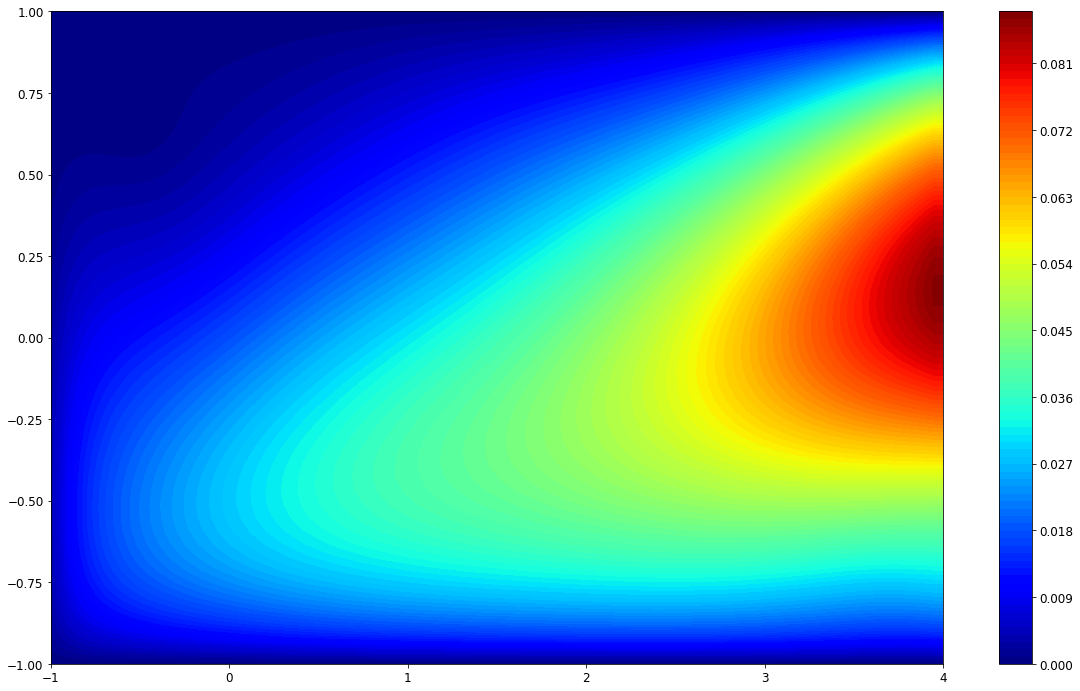

In [173]:
xi = np.linspace(x0,xn,nx)
yi = np.linspace(y0,yn,ny)
xx,yy = np.meshgrid(xi,yi)
# xx = xx[idx,idy]; yy = yy[idx,idy]
um = np.sqrt(u**2 + v**2)

fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
plt1 = ax.contourf(xx,yy,um[idx,idy],100,cmap ='jet')
# plt1 = ax.contourf(xx,yy,u[idx,idy],100,cmap ='jet')
# plt1 = ax.contourf(xx,yy,v[idx,idy],100,cmap ='jet')
# plt1 = ax.contourf(xx,yy,p[idx,idy],100,cmap ='jet')
# ax.quiver(xx,yy,u,v)

fig.colorbar(plt1)

--------------------------------------------------

## ELLIPTIC/PARABOLIC Solvers

In [24]:
def func(x,y):
    return -5*np.pi**(2)*np.sin(np.pi*x)*np.cos(2*np.pi*y)
def gfunc(x,y):
    return np.sin(np.pi*x)*np.cos(2*np.pi*y)
def func3(x,y):
    return (20)*np.cos(3*np.pi*x)*np.sin(2*np.pi*y)
def gfunc3(x,y):
    return -np.cos(3*np.pi*x)*np.sin(2*np.pi*y)
def func1(x,y):
    return 10*(np.pi**(2))*np.exp(np.sin(2*np.pi*(x+2*y)))*(-2*np.sin(2*np.pi*(x+2*y))+np.cos(4*np.pi*(x+2*y))+1)
def gfunc1(x,y):
    return np.exp(np.sin(2*np.pi*(x+2*y)))
def func2(x,y):
    return -8*(np.pi**(2))*np.cos(2*np.pi*x)*np.cos(2*np.pi*y)
def gfunc2(x,y):
    return np.cos(2*np.pi*x)*np.cos(2*np.pi*y)

In [6]:
from scipy.fftpack import dct,idct,fft,ifft,dst,idst

## Dirichlet

In [59]:
def fd2poissondst(f,g,a,b,m):
    
    h = (b-a)/(m+1)
    
    #Boundary Conditions
    ubs = g[0,1:m+1]
    ubn = g[m+1,1:m+1]
    ube = g[1:m+1,m+1]
    ubw = g[1:m+1,0]

    f[:m+1,0]-=ubw*(h**-2)
    f[:m+1,m-1]-=ube*(h**-2)
    f[0,:m+1]-=ubs*(h**-2)
    f[m-1,:m+1]-=ubn*(h**-2)

    fhat = dst(dst(f,1).T,1)/(2*m+2)
    
    j = np.arange(1,m+1)
    
    denom = np.add.outer(np.cos(j*np.pi/(m+1)),np.cos(j*np.pi/(m+1))) - 2
    uhat = ((h**2)*fhat)/(2*denom)
    
    u = idst(idst(uhat,1).T,1)/(2*m+2)

    return u

## Neumann

In [61]:
def fd2poissondct(f,a,b,m):
    
    h=(b-a)/(m+1)
    
    fhat=dct(dct(f,1).T,1)/(2*m+2)
    j=np.arange(0,m+2)
#     uhat = np.zeros((m+2,m+2))
    denom=np.cos((j*np.pi)/(m+1))+np.cos((j*np.pi)/(m+1))-2
#     print(len(dnm),np.shape(uhat),np.shape(fhat))

    denom[0] = 2
    uhat = (fhat*h**(2))/(2*denom)
    uhat[0,0] = 0
    u = idct(idct(uhat,1).T,1)/(2*m+2)
    
    return u

## Robin

## $\Delta u = f \ in \ \Omega$
## $\beta_1 (n\cdot\nabla) u + \beta_2 u = \beta_3  \ on \ \partial \Omega$

In [53]:
def fd2poissonsp(f,g,a,b,m):
    x=np.linspace(a,b,m+2)
    y=x
    X,Y=np.meshgrid(x,y)
    f=f(X[1:m+1,1:m+1],Y[1:m+1,1:m+1])
    g=g(X,Y)
    h=(b-a)/(m+1)
    
    
    # Sparse Differentiation Matrices (2D Laplacian)

    l1 = [  1 ]*(m-1)
    l0 = [ -2 ]*(m)

    D2 = sp.diags( [l1,l0,l1], [-1,0,1], format='csr')

    I = sp.eye(m)
    D2y = sp.kron(I,D2)
    D2x = sp.kron(D2,I)
    L = h**(-2)*(D2x+D2y)
    L[0,1] += L[0,1]
    L[-1,-2] += L[-1,-2]
    L[-3:,-6:-3] *= 2
    L[:3,3:6] *= 2

#     ubs = g[0,1:m+1]
#     ubn = g[m+1,1:m+1]
#     ube = g[1:m+1,m+1]
#     ubw = g[1:m+1,0]

#     f[:,0] -= ubw*(h**-2)
#     f[:,m-1] -= ube*(h**-2)
#     f[0,:m] -= ubs*(h**-2)
#     f[m-1,:m] -= ubn*(h**-2)

    f = np.reshape(f,m*m)
    
    # Solving the System
    u = sp.linalg.spsolve(L,f)
    u = np.reshape(u,(m,m))
    return u,X,Y

In [56]:
a,b=0,1
k = 8
m=(2**k)-1
usp,X,Y = fd2poissonsp(func3,gfunc2,a,b,m)

Text(0.5, 0, 'u(x,y)')

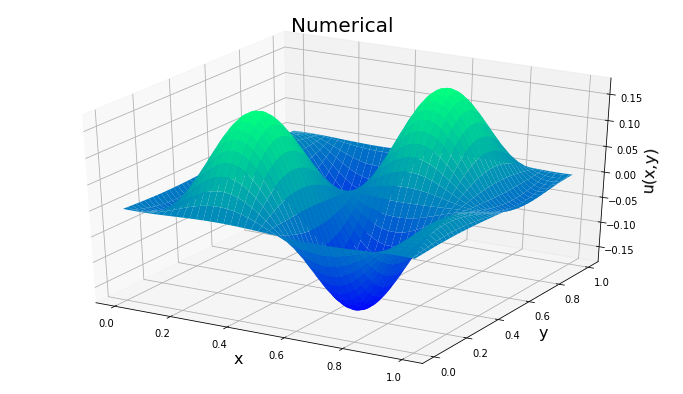

In [58]:
fig=plt.figure(figsize=(12,7))
ax=plt.gca(projection='3d')
ax.plot_surface(X[1:m+1,1:m+1],Y[1:m+1,1:m+1],usp,cmap='winter',label='True Solution')
plt.title('Numerical', fontsize=20)
ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$X$', fontsize=16)
ax.set_zlabel('$X$', fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')

## Convergence

0.0625 & 0.03613026196673546 & 2.0 \\
0.03125 & 0.008253889286681568 & 2.1300617232023615 \\
0.015625 & 0.0020030745433537453 & 2.1300617232023615 \\
0.0078125 & 0.0004951450665677472 & 2.0428579756459544 \\
0.00390625 & 0.00012319670901089083 & 2.0162929412629036 \\
0.001953125 & 3.0732418086772705e-05 & 2.0068875474825942 \\
0.0009765625 & 7.675189279745838e-06 & 2.0031305268426634 \\


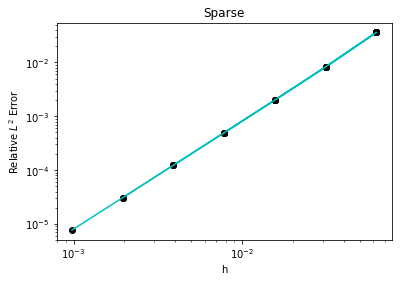

In [65]:
a,b=0,1
n=10
err2=[]
h2=[]
p2=[]
for k in range(4,n+1):
    m = (2**k)-1
    usp,X,Y=fd2poissonsp(func1,gfunc1,a,b,m)
    h=(b-a)/(m+1)
    uexact2=gfunc1(X[1:m+1,1:m+1],Y[1:m+1,1:m+1])
    err=relerr(usp,uexact2)
    h2.append(h)
    err2.append(err)
    for i in range(0,len(err2)-1):
        p=np.log(err2[i]/err2[i-1])/np.log(h2[i]/h2[i-1])
        p2.append(p)
        pm=np.mean(p2)
    print(h,"&",err,"&",p,"\\\\")
#     print("\hline")
    plt.loglog(h2,err2,"ko")
    plt.loglog(h2,err2,"c-")
    plt.xlabel("h")
    plt.ylabel("Relative $L^{2}$ Error")
    plt.title("Sparse")

0.0625 & 0.036130261966735404 & 2.0031305258039316 \\
0.03125 & 0.008253889286681125 & 2.130061723202437 \\
0.015625 & 0.0020030745433539227 & 2.130061723202437 \\
0.0078125 & 0.0004951450665664147 & 2.0428579756457492 \\
0.00390625 & 0.000123196709031296 & 2.0162929412669137 \\
0.001953125 & 3.0732418113990096e-05 & 2.006887547239757 \\
0.0009765625 & 7.675188998513673e-06 & 2.0031305258039316 \\


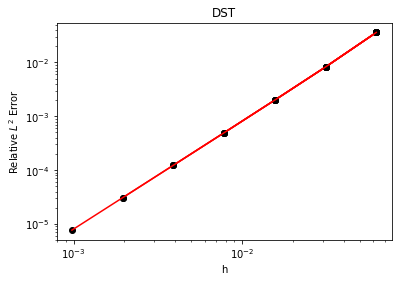

In [33]:
a,b=0,1
n=10
err2=[]
h2=[]
p2=[]
for k in range(4,n+1):
    m=(2**k)-1
    x=np.linspace(a,b,m+2)
    y=x
    X,Y=np.meshgrid(x,y)
    udst=fd2poissondst(func1(X[1:m+1,1:m+1],Y[1:m+1,1:m+1]),gfunc1(X,Y),a,b,m)
    h=(b-a)/(m+1)
    uexact2=gfunc1(X[1:m+1,1:m+1],Y[1:m+1,1:m+1])
    err=relerr(udst,uexact2)
    h2.append(h)
    err2.append(err)
    for i in range(0,len(err2)-1):
        p=np.log(err2[i]/err2[i-1])/np.log(h2[i]/h2[i-1])
        p2.append(p)
        pm=np.mean(p2)
    print(h,"&",err,"&",p,"\\\\")
#     print("\hline")
    plt.loglog(h2,err2,"ko")
    plt.loglog(h2,err2,"r-")
    plt.xlabel("h")
    plt.ylabel("Relative $L^{2}$ Error")
    plt.title("DST")

0.0625 & 0.012950746721879049 & 2.0031305258039316 \\
\hline
0.03125 & 0.0032189644400786605 & 2.0083667395265703 \\
\hline
0.015625 & 0.0008035776793811562 & 2.002087242798417 \\
\hline
0.0078125 & 0.00020082180971511582 & 2.0005215337004167 \\
\hline
0.00390625 & 5.020091601960044e-05 & 2.000130363345092 \\
\hline
0.001953125 & 1.2549944970388045e-05 & 2.000032651182611 \\
\hline
0.0009765625 & 3.13746686990917e-06 & 2.0000089080763397 \\
\hline


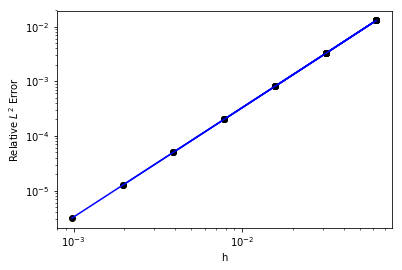

In [21]:
err1=[]
m1=[]
h1=[]
for k in range(4,11):
    m=(2**k)-1
    a,b=0,1
    x=np.linspace(a,b,m+2)
    y=x
    X,Y=np.meshgrid(x,y)
    h=(b-a)/(m+1)
    udct=fd2poissondct(func2(X,Y),a,b,m)
#     print(udct.shape)
    err=relerr(udct,gfunc2(X,Y))
    err1.append(err)
    h1.append(h)
    m1.append(m)
    for i in range(0,len(err1)-1):
        p=np.log(err1[i]/err1[i+1])/np.log(h1[i]/h1[i+1])
    print(h,"&",err,"&",p,"\\\\")
    print("\hline")
    plt.loglog(h1,err1,"ko")
    plt.loglog(h1,err1,"b-")
    plt.xlabel("h")
    plt.ylabel("Relative $L^{2}$ Error")

In [26]:
# order=linreg(np.log(h1),np.log(err1))[0]
# order
# for i in range(0,len(err1)-1):
#     p=np.log(err1[i]/err1[i+1])/np.log(h1[i]/h1[i+1])
#     print(p)

## Visualization

Text(0.5, 0, 'u(x,y)')

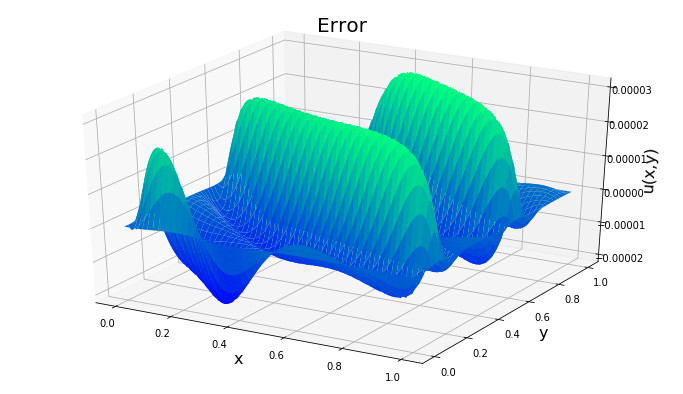

In [37]:
fig=plt.figure(figsize=(12,7))
ax=plt.gca(projection='3d')
ax.plot_surface(X[1:m+1,1:m+1],Y[1:m+1,1:m+1],udst-uexact2,cmap='winter',label='True Solution')
plt.title('Error', fontsize=20)
ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$X$', fontsize=16)
ax.set_zlabel('$X$', fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')

Text(0.5, 0, 'u(x,y)')

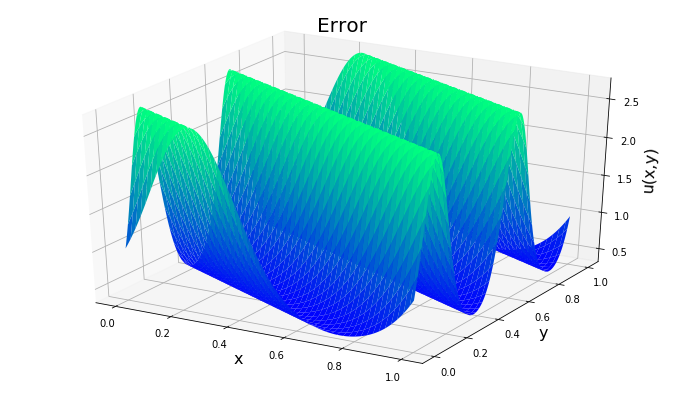

In [38]:
fig=plt.figure(figsize=(12,7))
ax=plt.gca(projection='3d')
ax.plot_surface(X[1:m+1,1:m+1],Y[1:m+1,1:m+1],udst,cmap='winter',label='True Solution')
plt.title('Error', fontsize=20)
ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$X$', fontsize=16)
ax.set_zlabel('$X$', fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')

Text(0.5, 0, 'u(x,y)')

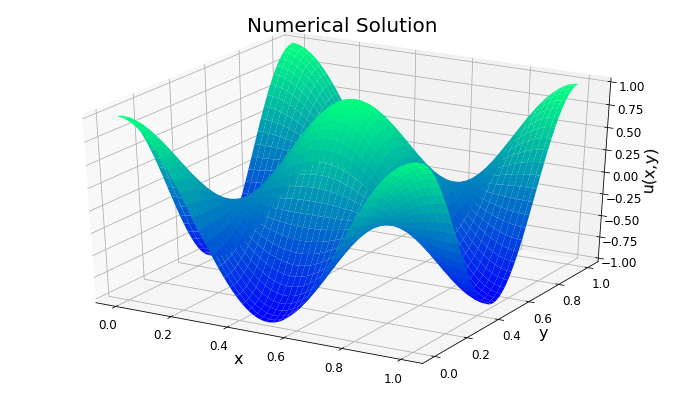

In [73]:
fig=plt.figure(figsize=(12,7))
ax=plt.gca(projection='3d')
ax.plot_surface(X,Y,udst,cmap='winter',label='True Solution')
plt.title('Numerical Solution', fontsize=20)
ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$X$', fontsize=16)
ax.set_zlabel('$X$', fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')

Text(0.5, 0, 'u(x,y)')

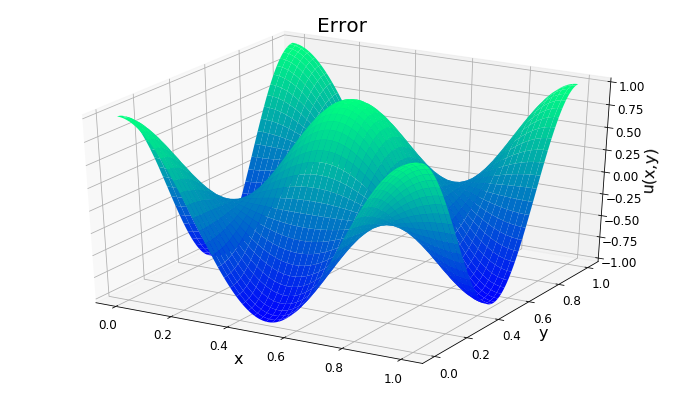

In [72]:
fig=plt.figure(figsize=(12,7))
ax=plt.gca(projection='3d')
ax.plot_surface(X,Y,udct,cmap='winter',label='True Solution')
plt.title('Error', fontsize=20)
ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$X$', fontsize=16)
ax.set_zlabel('$X$', fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')

Text(0.5, 0, 'u(x,y)')

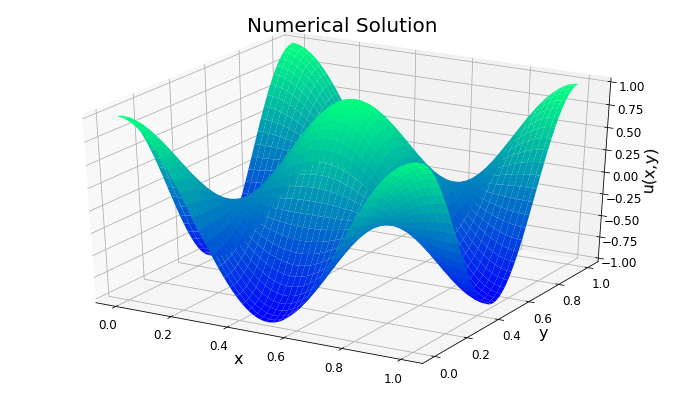

In [73]:
fig=plt.figure(figsize=(12,7))
ax=plt.gca(projection='3d')
ax.plot_surface(X,Y,udct,cmap='winter',label='True Solution')
plt.title('Numerical Solution', fontsize=20)
ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$X$', fontsize=16)
ax.set_zlabel('$X$', fontsize=16)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')

---------------------------------------------------------------

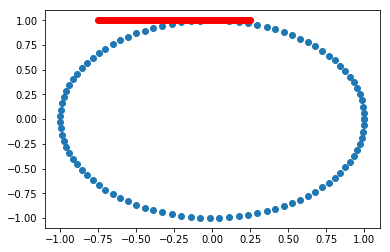

In [153]:
n = 100
r = np.zeros((n,2))
th = np.linspace(0,2*np.pi,n)
r[:,0] = np.cos(th)
r[:,1] = np.sin(th)
r1 = (-th + np.pi/2)/th.max()
r2 = th*0 + 1
plt.plot(r[:,0],r[:,1],'o')
plt.plot(r1,r2,'ro')

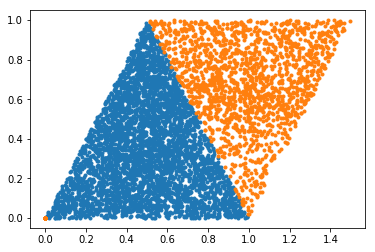

In [190]:
# https://www.geeksforgeeks.org/check-whether-a-given-point-lies-inside-a-triangle-or-not/
# A utility function to calculate area 
# of triangle formed by (x1, y1), 
# (x2, y2) and (x3, y3) 

def area(x1, y1, x2, y2, x3, y3): 

	return abs((x1 * (y2 - y3) + x2 * (y3 - y1) 
				+ x3 * (y1 - y2)) / 2.0) 


# A function to check whether point P(x, y) 
# lies inside the triangle formed by 
# A(x1, y1), B(x2, y2) and C(x3, y3) 
def isInside(x1, y1, x2, y2, x3, y3, x, y): 

	# Calculate area of triangle ABC 
	A = area (x1, y1, x2, y2, x3, y3) 

	# Calculate area of triangle PBC 
	A1 = area (x, y, x2, y2, x3, y3) 
	
	# Calculate area of triangle PAC 
	A2 = area (x1, y1, x, y, x3, y3) 
	
	# Calculate area of triangle PAB 
	A3 = area (x1, y1, x2, y2, x, y) 
	
	# Check if sum of A1, A2 and A3 
	# is same as A 
	if(A == A1 + A2 + A3): 
		return True
	else: 
		return False

# Driver program to test above function 
# Let us check whether the point P(10, 15) 
# lies inside the triangle formed by 
# A(0, 0), B(1, 0) and C(0.5, 1) 
n=10000
pt_inside=np.zeros((n,2))
for i in range(n):
    ptx1 = (1.0)*np.random.random(1) + 0.0 
    pty1 = (1.0)*np.random.random(1) + 0.0
    if (isInside(0, 0, 1, 0, 0.5, 1, ptx1, pty1)): 
        pt_inside[i,:] = np.array([ptx1,pty1]).flatten()

plt.plot((pt_inside.T)[0],(pt_inside.T)[1],'.')

n=10000
pt_inside2=np.zeros((n,2))
for i in range(n):
    ptx2 = (1.5)*np.random.random(1) + 0.0 
    pty2 = (1.5)*np.random.random(1) + 0.0
    if (isInside(1,0, 0.5, 1, 1.5, 1, ptx2, pty2)): 
        pt_inside2[i,:] = np.array([ptx2,pty2]).flatten()

plt.plot((pt_inside2.T)[0],(pt_inside2.T)[1],'.')

----------------

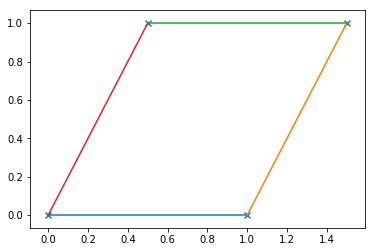

In [180]:
x=[0,1,1.5,0.5]
y=[0,0,1,1]
plt.plot(x[:2],y[:2],'-')
plt.plot(x[1:3],y[1:3],'-')
plt.plot(x[2:4],y[2:4],'-')
plt.plot(x[::-3],y[::-3],'-')
# plt.plot([1,0.5],[0,1],'-')
plt.scatter(x,y,marker='x')


## Member Functions

0.5 0.0 1
0.3535533905932738 0.35355339059327373 1
3.061616997868383e-17 0.5 1
-0.35355339059327373 0.3535533905932738 1
-0.5 6.123233995736766e-17 1
-0.35355339059327384 -0.35355339059327373 1
-9.184850993605148e-17 -0.5 1
0.3535533905932737 -0.35355339059327384 1
0.5 -1.2246467991473532e-16 1


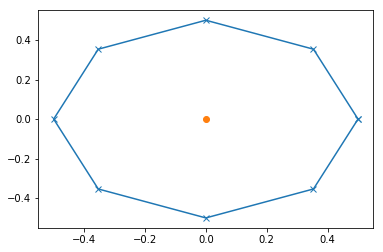

In [204]:
th=np.linspace(0,2*np.pi,9)
x,y=[0.5*np.cos(th),0.5*np.sin(th)]
plt.plot(x,y,'x-')
plt.plot(0,0,'o')
for xs,ys in zip(x,y):
    print(xs,ys,1)

In [27]:
# p[i,j] = ((p[i+1,j] + p[i-1,j])*hy**2 + (p[i,j+1] + p[i,j-1])*hx**2)/(2*(hx**2 + hy**2)) -\
#         rho*((hx**2 * hy**2 )/(2*(hx**2 + hy**2 ))) *((1/dt)*(gradxu(u,i,j,hx) + gradyu(v,i,j,hy)) -\
#                                                       ( gradxu(u,hx,i,j)**2 + 2*(gradyu(u,hy,i,j)*gradxu(v,hx,i,j)) + gradyu(v,hy,i,j)**2))


In [21]:

### $$u^{n}\partial_x u^{n} + v^{n}\partial_y u^{n} \approx u_{i,j}^{n}\frac{ u_{i+1,j}^{n} + u_{i-1,j}^{n}}{2h_x } + v_{i,j}^{n}\frac{ u_{i,j+1}^{n} + u_{i,j-1}^{n}}{2h_y } $$
### $$u^{n}\partial_x v^{n} + v^{n}\partial_y v^{n} \approx u_{i,j}^{n}\frac{ v_{i+1,j}^{n} + v_{i-1,j}^{n}}{2h_x } + v_{i,j}^{n}\frac{ v_{i,j+1}^{n} + v_{i,j-1}^{n}}{2h_y } $$

### $$u^{n}\partial_x u^{n} + v^{n}\partial_y u^{n} \approx u_{i,j}^{n}\frac{ u_{i+1,j}^{n} + u_{i,j}^{n}}{h_x } + v_{i,j}^{n}\frac{ u_{i,j+1}^{n} + u_{i,j-1}^{n}}{h_y } $$
### $$u^{n}\partial_x v^{n} + v^{n}\partial_y v^{n} \approx u_{i,j}^{n}\frac{ v_{i-1,j}^{n} + v_{i,j}^{n}}{h_x } + v_{i,j}^{n}\frac{ v_{i,j-1}^{n} + v_{i,j-1}^{n}}{h_y } $$

In [2]:
def sorloops(u,f,m,omega,h):
    err=0.0
    for jj in range(1,m+1):
            for kk in range(1,m+1):
                u[jj,kk] = (0.25*omega)*(u[jj-1,kk]+u[jj+1,kk]+u[jj,kk-1]+\
                                       u[jj,kk+1]-(h**2)*f[jj,kk]) + (1.0-omega)*u[jj,kk]
    res=np.zeros((m+1,m+1))
    for jj in range(1,m):
            for kk in range(1,m):
                res[jj,kk]= np.abs(f[jj,kk] - (-4*u[jj,kk]+u[jj-1,kk] \
                          +u[jj+1,kk]+u[jj,kk-1]+u[jj,kk+1])/(h**2))
    
    return u,res


In [3]:
def poissonsor(f,g,a,b,m):
    h=(b-a)/(m+1)
    omegaopt = 2.0/(1.0+np.sin(np.pi*h))

    #Mesh construction
    x = np.linspace(a,b,m+2)
    y = x
    X,Y = np.meshgrid(x,y)
    u = np.zeros((m+2,m+2))
    
    end1 = m+1
    end2 = m+2
    idx = np.arange(1,end2)
    idy = np.arange(1,end2)
    
    #Boundary Conditions 
    ubs = g(X[0,0:end2],Y[0,0:end2])
    ubn = g(X[end1,0:end2],Y[end1,0:end2])
    ube = g(X[idy,end1],Y[idy,end1])
    ubw = g(X[idy,0],Y[idy,0])
    
    u[0,:end2] = ubs
    u[end1,:end2] = ubn
    u[idx,end1] = ube
    u[idx,0] = ubw
    
    #RHS
    f = f(X,Y)
    
    # residual control and iterations
    tol = 1e-8
    nrmf = norm2(f.flatten())
    maxiter=10000
    itr=0
    for i in range(maxiter):
        u,res=sorloops(u,f,m,omegaopt,h)
        itr+=1
        err=norm2(res)
        if err <= tol*nrmf:
            break;
    return u,X,Y

In [107]:

# #Differentiation Matrices
# hx = (xn-x0)/(n+1)
# hx = (yn-y0)/(n+1)
# # l1 = [1]*(n-1)
# # l0 = [-2]*(n)

# # D2 = sp.diags( [l1,l0,l1], [-1,0,1], format='csr')

# # I = sp.eye(n)
# # D2y = (hy**-2)*sp.kron(I,D2)
# # D2x = (hx*-2)*sp.kron(D2,I)
# # L =  (D2x+D2y)



In [231]:
@jit(nopython=True)
def sorppeloops(u,v,p,rho,dt,nx,ny,hx,hy):

    omega = 0.2
    tol = 1e-4
    maxiter = 10000
    gradxu = np.zeros((nx,ny))
    gradyu = np.zeros((nx,ny))
    gradxv = np.zeros((nx,ny))
    gradyv = np.zeros((nx,ny))
    gradxu[idx,idy] = ( u[idx+1,idy] - u[idx-1,idy] )/(2*hx)
    gradyu[idx,idy] = ( u[idx,idy+1] - u[idx,idy-1] )/(2*hy)
    gradxv[idx,idy] = ( u[idx+1,idy] - u[idx-1,idy] )/(2*hx)
    gradyv[idx,idy] = ( u[idx,idy+1] - u[idx,idy-1] )/(2*hy)

#     for ii in range(maxiter):
#         for i in range(1,nx+1):
#             for j in range(1,ny+1):
#                 p[i,j] = (0.25*omega)*(((p[i+1,j] + p[i-1,j])*hy**2 + (p[i,j+1] + p[i,j-1])*hx**2)/(2*(hx**2 + hy**2)) -\
#                 rho*((hx**2 * hy**2 )/(2*(hx**2 + hy**2 ))) *((1/dt)*(gradxu[i,j] + gradyv[i,j]) -\
#                 ( gradxu[i,j]**2 + 2*(gradyu[i,j]*gradxv[i,j] + gradyv[i,j]**2)))) + (1-omega)*p[i,j]

#         res = np.zeros((nx+1,ny+1))
#         for i in range(1,nx):
#             for j in range(1,ny):
#                 res[i,j] = np.abs(p[i,j] - ((0.25*omega)*(((p[i+1,j] + p[i-1,j])*hy**2 + (p[i,j+1] + p[i,j-1])*hx**2)/(2*(hx**2 + hy**2)) -\
#                 rho*((hx**2 * hy**2 )/(2*(hx**2 + hy**2 ))) *((1/dt)*(gradxu[i,j] + gradyv[i,j]) -\
#                 ( gradxu[i,j]**2 + 2*(gradyu[i,j]*gradxv[i,j] + gradyv[i,j]**2))) + (1-omega)*p[i,j]))
    print("\r iteration = %d"%ii , end = " ")
#     if norm(res) <= tol:
#         print("\r residual = %g"%norm(res) , end = " ")
#         break;
    return p


## 2nd Order FD

In [386]:
def ufunc(r,t,alpha):
    return 1.0 + (np.cos(r))*np.exp(-alpha*t) 

In [255]:
from scipy.sparse.linalg import spsolve

In [428]:
def rk4hteq(f,g0,g1,tfinal,spatial_boundaries,alp,n,dt):
    b,a = spatial_boundaries
    x=np.linspace(a,b,n+2)
    offd=[1]
    md=[-2]
    D2 = sp.diags([ offd*(n-1),md*(n),offd*(n-1) ] \
                   ,[-1,0,1]).tocsr()
    u = np.zeros((1,n))
    u[0,:] = f(x[1:n+1],0.0,alp)
    t = 0.0; j = 0
    L=alp*D2
    while(t < tfinal):
        su1 = dt*L@u[j,:] 
        su2 = (dt)*L@(u[j,:] + (su1/2)) 
        su3 = (dt)*L@(u[j,:] + (su2/2)) 
        su4 = dt*L@(u[j,:] + su3)
        tmpu = u[j,:] + ( (su1/6) + (su2/3) + (su3/3) + (su4/6))
        u[j,:] = tmpu
#         u[j,0] = 0.0
#         u[j,-1] = 0.0
        t+=dt
    return u,x

In [392]:
def cnhteq(f,g0,g1,tfinal,spatial_boundaries,alp,n,nt):
    
    b , a = spatial_boundaries
    t=np.linspace(0,tfinal,nt)
    x=np.linspace(a,b,n+2)
    g0=g0(x[0],t,alp)
    g1=g1(x[-1],t,alp)
    
    #Stability Condition(CFL) r=alpha*(dt/2*dx**2)
    dx=(b-a)/(n+1)
    dt=tfinal/(nt-1)
    r=(alpha*dt)/(2*(dx**2))
    
    # RHS= alpha*(dt/dx**2)*D2(t=0)*u0 (f=u0)
    rhslu=[1*r]
    rhsm=[1-2*r]
    D20 = sp.diags([ rhslu*(n-1),rhsm*(n),rhslu*(n-1) ] \
                   ,[-1,0,1]).tocsr()
    
    # LHS alpha*(dt/dx**2)*D2(t)*u 
    lhslu=[-1*r]
    lhsm=[1+2*r]
    L2 = sp.diags([ lhslu*(n-1),lhsm*(n),lhslu*(n-1) ], \
                      [-1,0,1]).tocsr()
    
    us=[f(x[1:n+1],t[0],alp)]    
    for i in range(1,len(t)):
        rhs=D20@us[-1]
        rhs[0]+=r*(g0[i-1]+g0[i])
        rhs[-1]+=r*(g1[i-1]+g1[i])
        u=spsolve(L2,rhs)
        us.append(u)
    return us,t,x

def bdf2hteq(f,g0,g1,tfinal,spatial_boundaries,alp,n,nt):
   
    b,a = spatial_boundaries
    t=np.linspace(0,tfinal,nt)
    x=np.linspace(a,b,n+2)

    #Stability Condition(CFL) r=alpha*(dt/2*dx**2)
    dx=(b-a)/(n+1)
    dt=tfinal/(nt-1)
    r=(alp*dt)/((dx**2))
    
    # LHS= r*L2(t=0)*u0 (f=u0)
    lhslu=[1]
    lhsm=[-2]
    L2= sp.diags([ lhslu*(n-1),lhsm*(n),lhslu*(n-1) ] \
                   ,[-1,0,1]).tocsr()
    I=sp.eye(n)
    LHS=((3/2)*I -r*L2)
    
    #Solution vectors at time t= 0,1
    us=[f(x[1:n+1],t[0],alp)]
#     ucn=cnhteq(f,g0,g1,tspan,alp,N,m)[0]
    ucn = cnhteq(f,g0,g1,tfinal,spatial_boundaries,alp,n,nt)[0]
    us.append(ucn[1])
    
    #BCS
    g0=g0(x[0],t,alp)
    g1=g1(x[-1],t,alp)
    
    for i in range(2,len(t)):
        #RHS
        RHS=2*us[-1] - 0.5*us[-2]
        RHS[0]+=r*g0[i]
        RHS[-1]+=r*g1[i]
        u=spsolve(LHS,RHS)
        us.append(u)
    return us,t,x


In [415]:
n,nt=2**5, 2**5
alpha=0.01
tfinal=10
spatial_grid = -np.pi  ,np.pi
ucnc,t,theta=cnhteq(ufunc,ufunc,ufunc,tfinal,spatial_grid,alpha,n,nt)
ubdf,t,theta=bdf2hteq(ufunc,ufunc,ufunc,tfinal,spatial_grid,alpha,n,nt)
ubdf=np.array(ubdf)
ucnc=np.array(ucnc)

In [400]:
urk4=rk4hteq(ufunc,ufunc,ufunc,tfinal,spatial_grid,alpha,n,0.01)

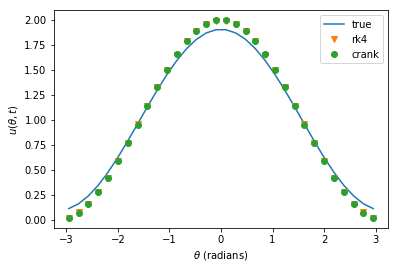

In [401]:
plt.plot(theta[1:-1],ufunc(theta[1:-1],t[-1],alpha),label = 'true')
plt.plot(theta[1:-1],urk4[0,:],'v',label = 'rk4')
plt.plot(theta[1:-1],ucnc[0,:],'o',label = 'crank')
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$u(\\theta,t)$')
plt.legend()

In [434]:
# ns = 2**np.arange(3,8)
# errs = []
# for n in ns:
#     print(n)
# #     urk4,x=rk4hteq(ufunc,ufunc,ufunc,tfinal,spatial_grid,alpha,n,tfinal/(n-1.0))
#     ubdf,t,theta=bdf2hteq(ufunc,ufunc,ufunc,tfinal,spatial_grid,alpha,n,n)
#     plt.plot(x[1:-1],ufunc(x[1:-1],t[-1],alpha)-urk4[0,:],label = 'true')
#     # plt.plot(theta[1:-1],urk4[0,:],'v',label = 'rk4')
#     errs.append(relerr(urk4[-1,:],ufunc(x[1:-1],t[-1],alpha)))
#     plt.xlabel('$\\theta$ (radians)')
#     plt.ylabel('$u(\\theta,t)$')
#     plt.legend()

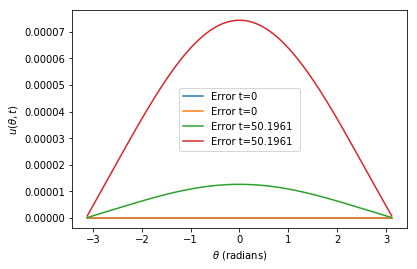

In [334]:
for i in range(0,nt,nt//2):
#     plt.plot(theta[1:-1],u[i],label = ' CrankNicolson t = %g'%t[i] )
#     plt.plot(theta[1:-1],ufunc(theta[1:-1],t[i]),label = 'Exact')
    plt.plot(theta[1:-1],ufunc(theta[1:-1],t[i])-ucnc[i],label = 'Error t=%g '%t[i])
    plt.plot(theta[1:-1],ufunc(theta[1:-1],t[i])-ubdf[i],label = 'Error t=%g '%t[i])
    plt.xlabel('$\\theta$ (radians)')
    plt.ylabel('$u(\\theta,t)$')
    plt.legend()

In [265]:
ns=2**(np.arange(6,12))

alpha=0.1
tfinal=1.0
errsbdf=[]
errsrk4=[]
errscn=[]
spatial_grid = -np.pi/np.pi  ,np.pi/np.pi
for n in ns:
    u1,t,theta=cnhteq(ufunc,ufunc,ufunc,tfinal,spatial_grid,alpha,n,n)
    u2,t,theta=bdf2hteq(ufunc,ufunc,ufunc,tfinal,spatial_grid,alpha,n,n)
    u3=rk4hteq(ufunc,ufunc,ufunc,tfinal,spatial_grid,alpha,n,tfinal/(n+1.0))
    u1=np.array(u1)
    u2=np.array(u2)
    space,time=np.meshgrid(theta,t)
    ut=ufunc(space,time,alpha)
    
    #Error Convergence
    errsbdf.append(relerr(u2[:,:],ut[:,1:n+1]))
    errscn.append(relerr(u1[:,:],ut[:,1:n+1]))
    errsrk4.append(relerr(u3[-1,:],ut[-1,1:n+1]))

NameError: name 'cnhteq' is not defined

In [412]:
errsbdf,errscn,errsrk4

([1.823643918985672e-06,
  4.6120663985838554e-07,
  1.159721832659782e-07,
  2.9076836608654017e-08,
  7.278491942444048e-09,
  1.8177019559094573e-09],
 [1.837853228174263e-06,
  4.647518367099553e-07,
  1.1685726467399792e-07,
  2.9298364268939825e-08,
  7.335069417784043e-09,
  1.8325227632467373e-09],
 [0.04646386760192832,
  0.046235186089739776,
  0.04610339599945428,
  0.04603291481559715,
  0.04599649929988707,
  0.045977994233537156])

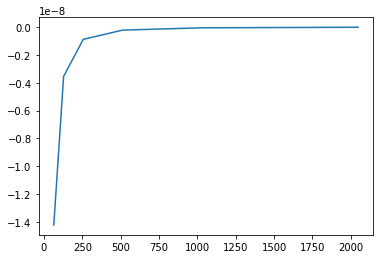

In [290]:
plt.plot(ns,np.array(errsbdf)-np.array(errscn))
# plt.loglog(ns,errscn)

In [32]:
# ps=[]
for i in range(len(ns)-1):
        p=-np.log(errs[i]/errs[i+1])/np.log(ns[i]/ns[i+1])
        print(p)

1.9834890850880698
1.991713141684732
1.9958553988574976
1.997937596581618
2.0009795000190707


In [96]:
o2 = [i**2 for i in h2]
o4 = [i**4 for i in h2]
o6 = [i**6 for i in h2]
for i in range(0,len(err2)-1):
    p=np.log(o6[i]/o6[i-1])/np.log(h2[i]/h2[i-1])
    print(p)

6.0
5.999999999999999
5.999999999999998
6.000000000000001
6.000000000000001
5.999999999999999


In [95]:
ns = [(2**k)-1 for k in range(4,11)]
ns = [k**(1/2) for k in ns]
h2 = [1/(k+1) for k in ns]

In [93]:
o6

[5.960464477539063e-08,
 9.313225746154785e-10,
 1.4551915228366852e-11,
 2.2737367544323206e-13,
 3.552713678800501e-15,
 5.551115123125783e-17,
 8.673617379884035e-19]

In [109]:
o6[-1],o6[0]

(7.765166022575353e-10, 7.468449299937176e-05)

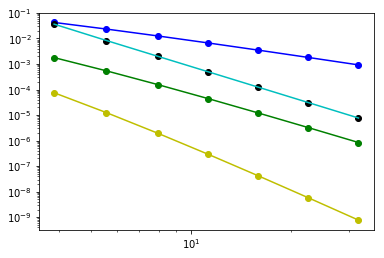

In [108]:
ht = None
plt.loglog(ns,o2,"bo-")
plt.loglog(ns,o4,"go-")
plt.loglog(ns,o6,"yo-")
plt.loglog(ns,err2,"ko")
plt.loglog(ns,err2,"c-")

# 1D Differential Operator Approx.

In [6]:
def func(x):
    return np.sin(x)
def dfunc(x):
    return np.cos(x)
def d2func(x):
    return -np.sin(x)

In [7]:
def df(xc,n):
    if n == 1:
        return np.array([0])
    elif n == 2:
        return np.array([0,xc])
    elif n == 3:
        return np.array([0,xc,2*xc])
    elif n == 4:
        return np.array([0,xc,2*xc,3*xc**2])
    elif n == 5:
        return np.array([0,xc,2*xc,3*xc**2,4*xc**3])
    
def df2(xc,n):
    if n == 1:
        return np.array([0])
    elif n == 2:
        return np.array([0,0])
    elif n == 3:
        return np.array([0,0,2])
    elif n == 4:
        return np.array([0,0,2,6*xc])
    elif n == 5:
        return np.array([0,0,2,6*xc,12*xc**2])
    elif n == 6:
        return np.array([0,0,2,6*xc,12*xc**2,20*xc**3])
    elif n == 7:
        return np.array([0,0,2,6*xc,12*xc**2,20*xc**3,30*xc**4])
    elif n == 9:
        return np.array([0,0,2,6*xc,12*xc**2,20*xc**3,30*xc**4,42*xc**5,56*xc**6])

## 2nd Derivative Approx

In [8]:
def df2_O8_center(w,u,x,h,n):
    du = np.zeros(n)
    deriv = d2func
    du[ -1 ] = deriv(x[-1])
    du[ -2 ] = deriv(x[-2])
    du[ -3 ] = deriv(x[-3])
    du[ -4 ] = deriv(x[-4])
    du[  0 ] = deriv(x[0])
    du[  1 ] = deriv(x[1])
    du[  2 ] = deriv(x[2])
    du[  3 ] = deriv(x[3])
    for i in range(4,n-4):
        du[i] = (w[0]*u[i - 4] + w[1]*u[i - 3] +\
                 w[2]*u[i - 2] + w[3]*u[i - 1] +\
                 w[4]*u[i] +     w[5]*u[i + 1] +\
                 w[6]*u[i + 2] + w[7]*u[i + 3] +\
                 w[8]*u[i + 4]) * (h**(-2))
    deriv = d2func
#     du[ -1 ] = deriv(x[-1])
#     du[ -2 ] = deriv(x[-2])
#     du[ -3 ] = deriv(x[-3])
#     du[ -4 ] = deriv(x[-4])
#     du[  0 ] = deriv(x[0])
#     du[  1 ] = deriv(x[1])
#     du[  2 ] = deriv(x[2])
#     du[  3 ] = deriv(x[3])
    return du

In [9]:
def df2_O6_center(w,u,x,h,n):
    du = np.zeros(n)
    deriv = d2func
    du[ -1 ] = deriv(x[-1])
    du[ -2 ] = deriv(x[-2])
    du[ -3 ] = deriv(x[-3])
    du[  0 ] = deriv(x[0])
    du[  1 ] = deriv(x[1])
    du[  2 ] = deriv(x[2])
    for i in range(3,n-3):
        du[i] = (w[0]*u[i - 3] + w[1]*u[i - 2] + w[2]*u[i - 1] + w[3]*u[i] + \
                 w[4]*u[i + 1] +  w[5]*u[i + 2] + w[6]*u[i + 3]) * (h**(-2))
#     deriv = d2func
#     du[ -1 ] = deriv(x[-1])
#     du[ -2 ] = deriv(x[-2])
#     du[ -3 ] = deriv(x[-3])
#     du[  0 ] = deriv(x[0])
#     du[  1 ] = deriv(x[1])
#     du[  2 ] = deriv(x[2])
    return du

In [10]:
def df2_O4_center(w,u,x,h,n):
    du = np.zeros(n)
#     print(w)
    du[  0 ] = d2func(x[0])
    du[ -1 ] = d2func(x[-1])
    du[ -2 ] = d2func(x[-2])
    du[  1 ] = d2func(x[1])
    for i in range(2,n-2):
        du[i] = (w[0]*u[i - 2] + w[1]*u[i - 1] + w[2]*u[i] + \
                 w[-2]*u[i + 1] +  w[-1]*u[i + 2]) * (h**(-2))
#     du[  0 ] = d2func(x[0])
#     du[ -1 ] = d2func(x[-1])
#     du[ -2 ] = d2func(x[-2])
#     du[  1 ] = d2func(x[1])
    return du

In [11]:
def df2_O2_center(w,u,x,h,n):
    du = np.zeros(n)
#     print(w)
    for i in range(1,n-1):
        du[i] = (w[0]*u[i - 1] + w[1]*u[i] + w[2]*u[i + 1]) * (h**(-2))
    du[  0 ] = d2func(x[0])
    du[ -1 ] = d2func(x[-1])
    return du

## 1st Derivative Approx

In [12]:
def df_O2_center(w,u,x,h,n):
    du = np.zeros(n)
    for i in range(1,n-1):
        du[i] = (w[0]*u[i-1] + w[-1]*u[i + 1]) * (h**(-1))
    du[ -1 ] = dfunc(x[-1])
    du[  0 ] = dfunc(x[0])
    return du

In [13]:
def df_O2_forward(w,u,x,h,n):
    du = np.zeros(n)
    du[-1] = dfunc(x[-1])
    du[-2] = dfunc(x[-2])
    for i in range(n-2):
        du[i] = (w[-1]*u[i] +  w[1]*u[i + 1] + w[0]*u[i + 2]) * (h**(-1))
#     du[-1] = dfunc(x[-1])
#     du[-2] = dfunc(x[-2])
    return du

In [14]:
def df_O3_forward(w,u,x,h,n):
    du = np.zeros(n)
    for i in range(n-3):
        du[i] = (w[-1]*u[i] +  w[2]*u[i + 1] + w[1]*u[i + 2] + w[0]*u[i + 3] ) * (h**(-1))
    du[-3] = dfunc(x[-3])
    du[-2] = dfunc(x[-2])
    du[-1] = dfunc(x[-1])
    return du

In [15]:
def df_O4_forward(w,u,h,n):
    du = np.zeros(n)
    for i in range(n-4):
        du[i] = (w[-1]*u[i] +  w[3]*u[i + 1] +\
                 w[2]*u[i + 2] + w[1]*u[i + 3] + w[0]*u[i + 4] ) * (h**(-1))
    du[-4] = dfunc(x[-4])
    du[-3] = dfunc(x[-3])
    du[-2] = dfunc(x[-2])
    du[-1] = dfunc(x[-1])
    return du

------

In [464]:
b = 1; a = -1;
ns = [2**i for i in range(3,8)]
hs = []
erro2 = []
erro4 = []
erro6 = []
erro8 = []
no = 3
ig = no//2
idx = np.linspace(-ig,ig,no)
A = np.vander(idx,N=no,increasing=True)
deriv = df2
w = gesol(A.T,deriv(idx[ig],no))
for n in ns:
    x = np.linspace(a,b,n)
    u = func(x)
    h = (b - a)/( n - 1 )
    hs.append(h)
    da = df2_O2_center(w,u,x,h,n)
    erro2.append(relerr(da[ig:-ig],d2func(x[ig:-ig])))
no = 5
ig = no//2
idx = np.linspace(-ig,ig,no)
A = np.vander(idx,N=no,increasing=True)
deriv = df2
w = gesol(A.T,deriv(idx[ig],no))
for n in ns:
    x = np.linspace(a,b,n)
    u = func(x)
    h = (b - a)/( n - 1 )
    hs.append(h)
    da = df2_O4_center(w,u,x,h,n)
    erro4.append(relerr(da[ig:-ig],d2func(x[ig:-ig])))
no = 7
ig = no//2
idx = np.linspace(-ig,ig,no)
A = np.vander(idx,N=no,increasing=True)
deriv = df2
w = gesol(A.T,deriv(idx[ig],no))
for n in ns:
    x = np.linspace(a,b,n)
    u = func(x)
    h = (b - a)/( n - 1 )
    hs.append(h)
    da = df2_O6_center(w,u,x,h,n)
    erro6.append(relerr(da[ig:-ig],d2func(x[ig:-ig])))
no = 9
ig = no//2
idx = np.linspace(-ig,ig,no)
A = np.vander(idx,N=no,increasing=True)
deriv = df2
w = gesol(A.T,deriv(idx[ig],no))
for n in ns:
    x = np.linspace(a,b,n)
    u = func(x)
    h = (b - a)/( n - 1 )
    hs.append(h)
    da = df2_O8_center(w,u,x,h,n)
    erro8.append(relerr(da[ig:-ig],d2func(x[ig:-ig])))

/home/aj/Desktop/rbf/rbfworks/libhelper.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return np.linalg.norm((uapprox-uexact))/np.linalg.norm((uexact))


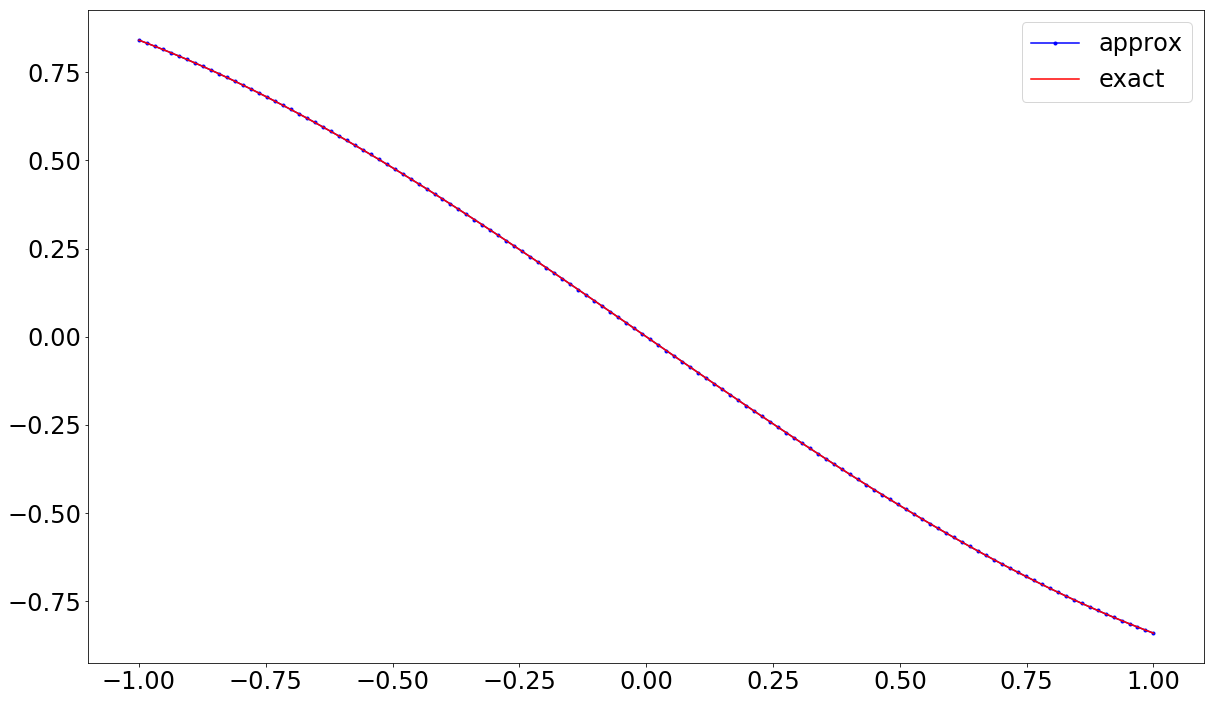

In [469]:
plt.plot(x,da,'b.-',label = 'approx')
plt.plot(x,d2func(x),'r-',label = 'exact')
plt.legend()

In [465]:
e2 = -linregress(np.log(np.array(ns)),np.log(np.array(erro2)))[0]
e4 = -linregress(np.log(np.array(ns)),np.log(np.array(erro4)))[0]
e6 = -linregress(np.log(np.array(ns)),np.log(np.array(erro6)))[0]
e8 = -linregress(np.log(np.array(ns)),np.log(np.array(erro8)))[0]

/home/aj/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/aj/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/aj/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


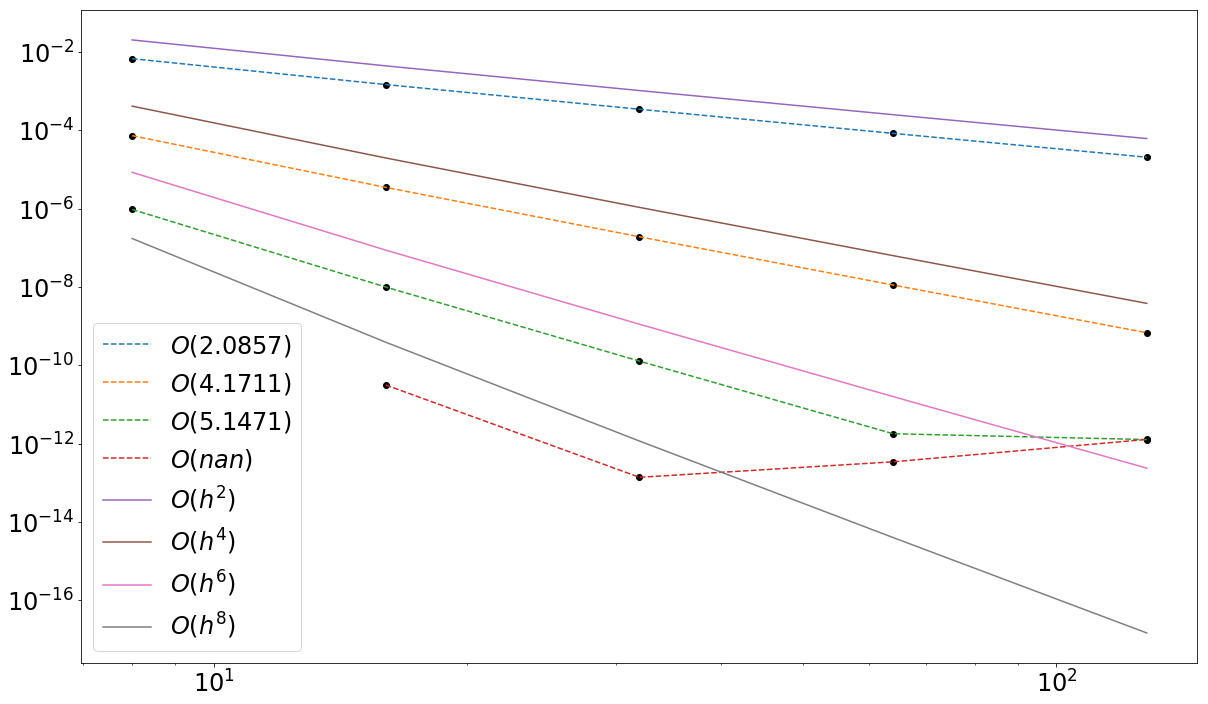

In [468]:
plt.loglog(ns,erro2,'ko')
plt.loglog(ns,erro4,'ko')
plt.loglog(ns,erro6,'ko')
plt.loglog(ns,erro8,'ko')
plt.loglog(ns,erro2,'--',label = '$O('+str(round(e2,4))+')$' )
plt.loglog(ns,erro4,'--',label = '$O('+str(round(e4,4))+')$' )
plt.loglog(ns,erro6,'--',label = '$O('+str(round(e6,4))+')$' )
plt.loglog(ns,erro8,'--',label = '$O('+str(round(e8,4))+')$' )
o2 = [1/(ns[i]-1)**2 for i in range(len(ns))]
o4 = [1/(ns[i]-1)**4 for i in range(len(ns))]
o6 = [1/(ns[i]-1)**6 for i in range(len(ns))]
o8 = [1/(ns[i]-1)**8 for i in range(len(ns))]
plt.loglog(ns,o2,'-',label='$O(h^{2})$')
plt.loglog(ns,o4,'-',label='$O(h^{4})$')
plt.loglog(ns,o6,'-',label='$O(h^{6})$')
plt.loglog(ns,o8,'-',label='$O(h^{8})$')
plt.legend()

# 2D Differential Operator Approx.

In [431]:
def func2d(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)
def func2d_1(x,y):
    return np.sin(np.pi*(x+y))

def d2func2d(x,y):
    return (-8*np.pi**2)*(np.sin(2*np.pi*x)*np.cos(2*np.pi*y))
def d2func2d_1(x,y):
    return (-2*np.pi**2)*np.sin(np.pi*(x+y))

In [380]:
def lapu(u,w,ny,nx,h):
    mid = len(w)//2
    if len(w) == 3:
        idx = np.arange(mid,ny+1).reshape(ny,1)
        idy = np.arange(mid,nx+1).reshape(1,nx)
        return (w[0]*u[idx + 1 ,idy] + w[-1]*u[ idx - 1, idy ] + w[mid]*u[idx,idy] )/(h**2)+\
                (w[0]*u[idx , idy + 1 ] + w[-1]*u[ idx , idy - 1 ] + w[mid]*u[idx,idy] )/(h**2),idx,idy
    
    elif len(w) == 5:
        idx = np.arange(mid,ny).reshape(ny-mid,1)
        idy = np.arange(mid,nx).reshape(1,nx-mid)
        return (w[0]*u[idx + 2 ,idy] + w[1]*u[idx + 1 ,idy] +\
                w[-2]*u[ idx - 1, idy ] + w[-1]*u[idx - 2 ,idy] +\
                w[mid]*u[idx,idy] )/(h**2)+\
                (w[0]*u[idx , idy + 2 ] + w[1]*u[ idx , idy + 1 ] +\
                 w[-2]*u[idx , idy - 1 ] + w[-1]*u[ idx , idy - 2 ] +\
                 w[mid]*u[idx,idy] )/(h**2),idx,idy
    
    elif len(w) == 7:
        idx = np.arange(mid,ny-1).reshape(ny-(mid+1),1)
        idy = np.arange(mid,nx-1).reshape(1,nx-(mid+1))
        return (w[0]*u[idx + 3 ,idy] + w[1]*u[idx + 2 ,idy] + w[2]*u[idx + 1 ,idy] +\
                w[-3]*u[ idx - 1, idy ] + w[-2]*u[ idx - 2, idy ] + w[-1]*u[idx - 3 ,idy] + w[mid]*u[idx,idy] )/(h**2) +\
                (w[0]*u[idx,idy + 3] + w[1]*u[idx ,idy + 2] + w[2]*u[idx,idy + 1] +\
                w[-3]*u[ idx, idy - 1 ] + w[-2]*u[ idx, idy - 2 ] + w[-1]*u[idx ,idy - 3] + w[mid]*u[idx,idy] )/(h**2),idx,idy

In [410]:
no = 7
ig = no//2
idx = np.linspace(-ig,ig,no)
A = np.vander(idx,N=no,increasing=True)
deriv = df2
w = gesol(A.T,deriv(idx[ig],no))

In [411]:
w

array([ 0.01111111, -0.15      ,  1.5       , -2.72222222,  1.5       ,
       -0.15      ,  0.01111111])

In [432]:
x,y = sym.symbols('x y')
u = sym.sin(sym.pi*(x))*sym.sin(sym.pi*(y))
lapusym = sym.lambdify((x,y),sym.diff(u,x,x) + sym.diff(u,y,y),'numpy')

In [433]:
x0 = -1 ; xn = 1
y0 = -1 ; yn = 1
ns = [2**i for i in range(5,9)]
errs = []
for nx,ny in zip(ns,ns):
    print(nx,ny)
    hy = (yn - y0)/( ny + 1 )
    hx = (xn - x0)/( nx + 1 )
    xi = np.linspace(x0,xn,nx+2)
    yi = np.linspace(y0,yn,ny+2)
    xx,yy = np.meshgrid(xi,yi)
    unp = func2d(xx,yy)
    du,idx,idy = lapu(unp,w,nx,ny,hx)
    d2ue = lapusym(xx,yy)[idx,idy]
#     d2ue = d2func2d(xx,yy)[idx,idy]
    errs.append(relerr(du,d2ue))


32 32
64 64
128 128
256 256


In [434]:
e2d = -linregress(np.log(np.array(ns)),np.log(np.array(errs)))[0]
e2d

5.563184230753206

In [435]:
for i in range(len(errs)-1):
        p=-np.log(errs[i]/errs[i+1])/np.log(ns[i]/ns[i+1])
        print(p)

5.861807863007357
5.9322209981788605
4.772511575264847


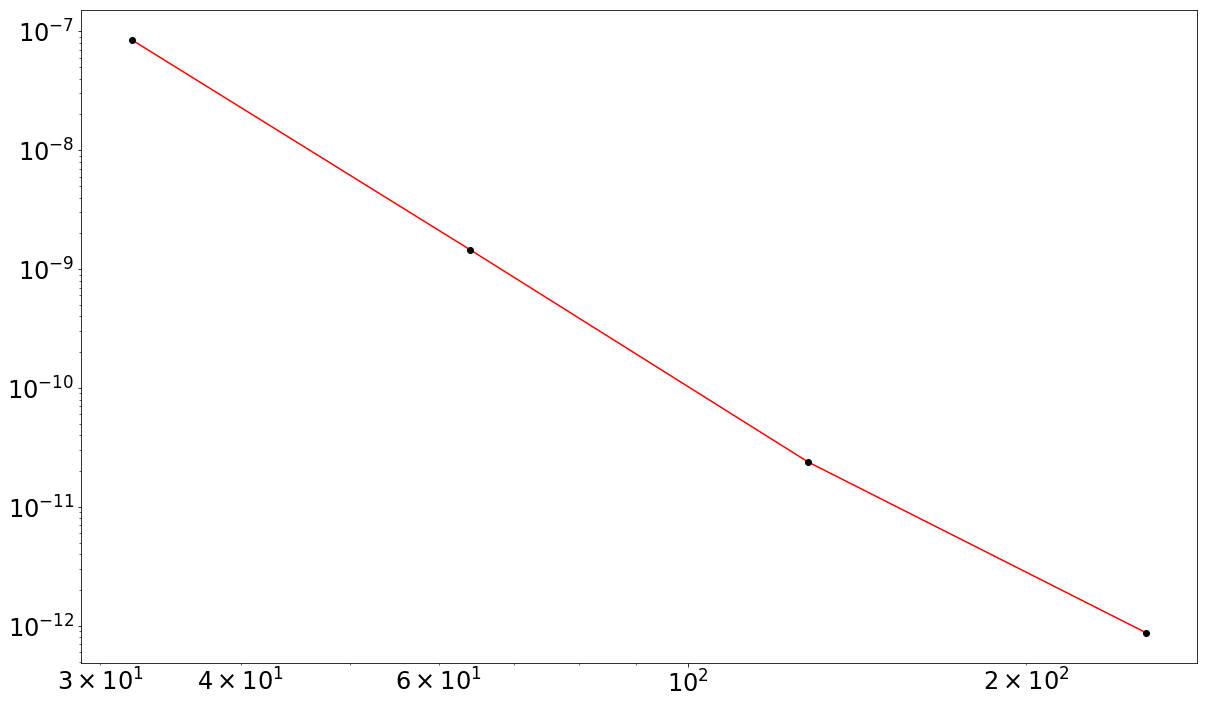

In [436]:
plt.loglog(ns,errs,'r-')
plt.loglog(ns,errs,'ko')

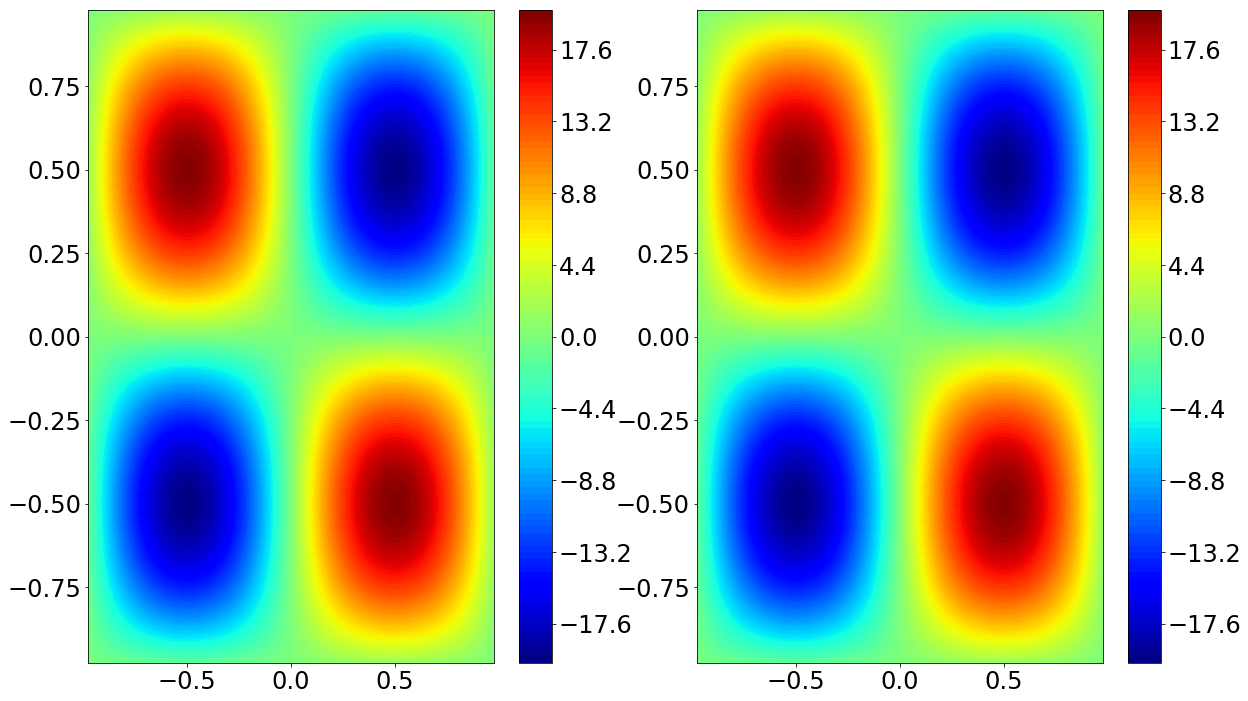

In [437]:
# POST-PRCOESSING
xp = xx[idx,idy]
yp = yy[idx,idy]

# SHOW FIGURES
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,2,1)
plt1 = ax.contourf(xp,yp,d2ue,100,cmap = 'jet')
fig.colorbar(plt1)

ax=fig.add_subplot(1,2,2)
plt2 = ax.contourf(xp,yp,du,100,cmap = 'jet')
fig.colorbar(plt2)


## Stencil 2D - 3D Finite Difference

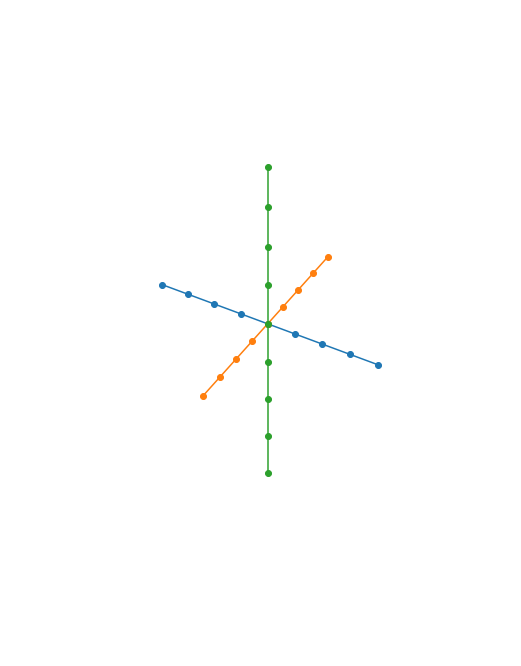

In [470]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,2,2,projection='3d')
plt.gca().patch.set_facecolor('white')
ax._axis3don = False
stencil = np.linspace(-ig,ig,no)
ax.plot(stencil,np.zeros(no),np.zeros(no),marker='o')
ax.plot(np.zeros(no),stencil,np.zeros(no),marker='o')
ax.plot(np.zeros(no),np.zeros(no),stencil,marker='o')
